# **Computer Vision**

- [Computer vision](https://en.wikipedia.org/wiki/Computer_vision) is the art of teaching a computer to see anything that can described in a **visual** sense.
- It could involve building a model to  
    - classify whether a photo is of a cat or a dog ([i.e., binary classification](https://developers.google.com/machine-learning/glossary#binary-classification)),
    - classify whether a photo is of a cat, dog or chicken ([i.e., multi-class classification](https://developers.google.com/machine-learning/glossary#multi-class-classification)),
    - identify where a car appears in a video frame ([i.e., object detection](https://en.wikipedia.org/wiki/Object_detection))
    - figure out where different objects in an image can be separated ([i.e., panoptic segmentation](https://arxiv.org/abs/1801.00868)).

- Practical applications:
    - Camera and photo apps in a smartphone use [computer vision to enhance](https://machinelearning.apple.com/research/panoptic-segmentation) and sort images.
    - Modern cars use [computer vision](https://youtu.be/j0z4FweCy4M?t=2989) to avoid other cars and stay within lane lines.
    - Manufacturers use computer vision to **identify defects** in various products.
    - Security cameras use computer vision to **detect potential intruders**.

- CV Library in PyTorch: [`torchvision`](https://pytorch.org/vision/stable/index.html)
  - Example CV datasets: [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html)
  - Commonly used model architectures: [`torchvision.models`](https://pytorch.org/vision/stable/models.html)
  - Common image transformations: [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html)



In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.3.0+cu121
torchvision version: 0.18.0+cu121


# **1. Preparing Dataset**

- PyTorch has a bunch of common CV datasets stored in `torchvision.datasets`.
- **FashionMNIST** in [`torchvision.datasets.FashionMNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) is one of those datasets.
    - MNIST stands for Modified National Institute of Standards and Technology
    - The dataset contains grayscale images of 10 different kinds of clothing.
    - Since it has different types of clothing (image classes), it is a **multi-class classification** problem.


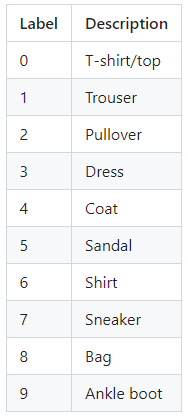

- To download the FashinMNIST PyTorch dataset, the following parameters are used:
  * `root: str` - The **folder** where the data to be saved.
  * `train: Bool` - If `True`, **training set** will be saved else **test set**.
  * `download: Bool` - If `True`, download dataset if not in root folder.
  * `transform: torchvision.transforms` - Transformations to do on the input data.
  * `target_transform` - Transform the targets (labels) if needed.

- Other datasets in `torchvision` have also these parameter options.

In [ ]:
train_dataset = datasets.FashionMNIST(root="data", train=True, download=True,
                                   transform=ToTensor(), target_transform=None)

train_dataset

100%|██████████| 26421880/26421880 [00:00<00:00, 27509666.11it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 79764743.92it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 45603418.86it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15163115.87it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_dataset = datasets.FashionMNIST(root="data", train=False, download=True,
                                  transform=ToTensor())
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

- Now the data is saved in the directory `"data/FashinMNIST"`.

## **1.1. Number of Examples in Training and Testing Sets**

- How many examples are there?

In [ ]:
len(train_dataset.data), len(train_dataset.targets), len(test_dataset.data), len(test_dataset.targets)

(60000, 60000, 10000, 10000)

- There are 60,000 training examples and 10,000 testing examples.

## **1.2. Inspecting Class Names**

- The **class names** as a list can be inspected using `.classes` attribute.
- The **class names** as a dictionary can be accessed using `.class_to_idx` attribute.

In [ ]:
classes_list = train_dataset.classes
classes_list

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
classes_dict = train_dataset.class_to_idx
classes_dict

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

- 10 different kinds of clothes.
- **Multi-class classification** problem

## **1.3. Indexing Image Tensors and Labels**

- The premise remains:
    - **encode data into numbers**,
    - **build a model to find patterns** in those numbers,
    - **convert those patterns into something** meaningful.


In [ ]:
train_dataset.data.shape, train_dataset.targets.shape, test_dataset.data.shape, test_dataset.targets.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

In [ ]:
train_dataset.data.shape[1:], test_dataset.data.shape[1:]

(torch.Size([28, 28]), torch.Size([28, 28]))

- Let us check out the first sample of the training dataset.

In [ ]:
image_tensor, target = train_dataset[0]
image_tensor, target

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

- What is the shape of the image tensor?

In [ ]:
print(f"Image tensor shape: {image_tensor.shape} -> [color_channels, height, weight]")
print(f"Target: {target}, Image label: {classes_list[target]}")

Image tensor shape: torch.Size([1, 28, 28]) -> [color_channels, height, weight]
Target: 9, Image label: Ankle boot


- The shape of the image tensor is represented as `CHW` (Color Channels, Height, Width).
- That is, the shape is of the form `[1, 28, 28]`:

      ```
      [color_channels=1, height=28, width=28]

      ```

- Hence, `color_channels=1` means the image is **grayscale**.
    - Grayscale images have 1 color channel.
    - Pixel value is 0 for black and 1 for pure white.
- Had it been `color_channels=3`, the image comes from **red**, **green** and **blue** (aka [RGB color](https://en.wikipedia.org/wiki/RGB_color_model)) pixels.

- There is no agreement on whether images should be represented as `CHW` (color channels first) or `HWC` (color channels last).
- PyTorch generally accepts `CHW` (channels first) as the default for many operators.
- `HWC` (channels last) is also [recommended in PyTorch](https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice) as it performs better when working on larger image datasets (to be discussed later in CNN).
- For now, since the dataset and models are relatively small, this will not make too much difference.
- There may be also `NCHW` and `NHWC` formats where `N` stands for **number of images** (batch size).
  ```
  [batch_size, color_channels, height, width]

  ```
- For example if `batch_size=32`, the image tensor shape may be represented as:

     `NCHW: [32, 1, 28, 28]` or `NHWC: [32, 28, 28, 1]`.

## **1.4. Visualizing Image Tensor Data as Image**

In [ ]:
import matplotlib.pyplot as plt
image_tensor, target = train_dataset[0]
print(f"Image tensor shape: {image_tensor.shape}, Target: {target}")

Image tensor shape: torch.Size([1, 28, 28]), Target: 9


- The input shape of `[1,28,28]` (that is, **color channels first**) does **not match with** what `matplotlib` expects the **color channels to be last**.
- Or `matplotlib` expects the height and width with **no color channel for grayscale images**????????????.
- For the grayscale image, `.squeeze` can get rid of the extra dimension.

In [ ]:
image_tensor.squeeze().shape

torch.Size([28, 28])

Image tensor shape: torch.Size([1, 28, 28])


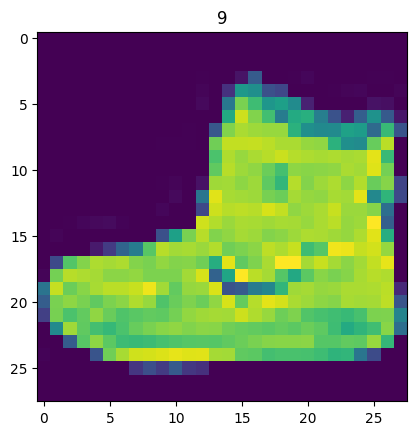

In [ ]:
image_tensor, target = train_dataset[0]
print(f"Image tensor shape: {image_tensor.shape}")
plt.imshow(image_tensor.squeeze()) # image shape is [28, 28] (height, width)
plt.title(target);

- Since it is a $28\times 28$ pixels image, it not a very high definition image.

- The image can turn into grayscale using the `cmap` parameter of `plt.imshow()`.

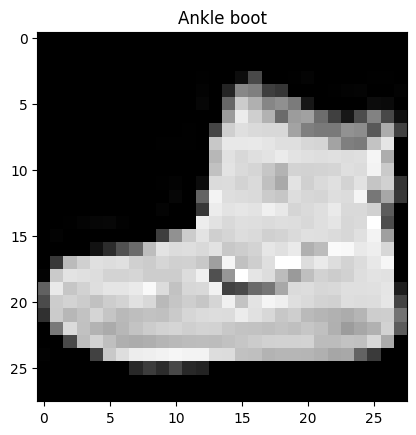

In [ ]:
plt.imshow(image_tensor.squeeze(), cmap="gray")
plt.title(classes_list[target]);

- Let us remove the axis:

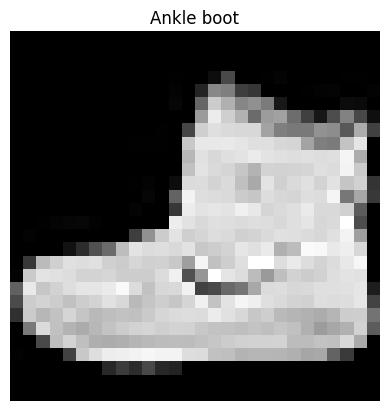

In [ ]:
plt.imshow(image_tensor.squeeze(), cmap="gray")
plt.title(classes_list[target])
plt.axis(False);

- A pixelated grayscale ankle boot can get.

- Let us view a some more random sample of images.

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    print(random_idx)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


<Figure size 900x900 with 0 Axes>

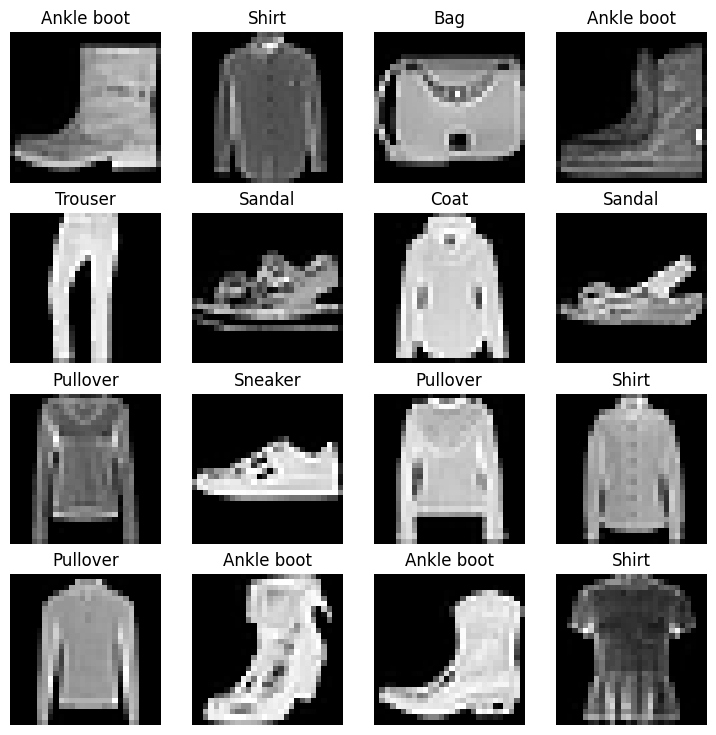

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    image_tensor, target = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image_tensor.squeeze(), cmap="gray")
    plt.title(classes_list[target])
    plt.axis(False);

- This dataset might not look too aesthetic.
- But the principles how to build a model will be similar across a wide range of CV problems.
- In essence, taking pixel values and building a model to find patterns in them.
    - Do the data be modeled with only straight (linear) lines?
    - Or are non-straight (non-linear) lines required to do the classification?

## **1.5. Image `Dataset` to Pandas `DataFrame`**

- Convert the train dataset to a Pandas DataFrame.

In [ ]:
import numpy as np
import pandas as pd

image_tensor_shape = train_dataset.data.shape[1:]
num_pixels = np.prod(image_tensor_shape)

train_array = train_dataset.data.reshape(-1, num_pixels).numpy()
columns = ['Pixel_' + str(i+1) for i in range(num_pixels)]
train_df = pd.DataFrame(train_array, columns=columns)
train_df['Target'] = train_dataset.targets
train_df['Label'] = [classes_list[v] for v in train_dataset.targets]

train_df

,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,...,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,Pixel_784,Target,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,Ankle boot
1,0,0,0,0,0,1,0,0,0,0,...,130,76,0,0,0,0,0,0,0,T-shirt/top
2,0,0,0,0,0,0,0,0,0,22,...,1,0,0,0,0,0,0,0,0,T-shirt/top
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,3,Dress
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T-shirt/top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,Sandal
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Trouser
59997,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,3,Dress
59998,0,0,0,0,0,0,0,0,0,0,...,50,5,0,1,0,0,0,0,0,T-shirt/top


In [ ]:
image_tensor_shape = test_dataset.data.shape[1:]
num_pixels = np.prod(image_tensor_shape)

test_array = test_dataset.data.reshape(-1, num_pixels).numpy()
columns = ['Pixel_' + str(i+1) for i in range(num_pixels)]
test_df = pd.DataFrame(test_array, columns=columns)
test_df['Target'] = test_dataset.targets
test_df['Label'] = [classes_list[v] for v in test_dataset.targets]

test_df

,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,...,Pixel_777,Pixel_778,Pixel_779,Pixel_780,Pixel_781,Pixel_782,Pixel_783,Pixel_784,Target,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,Ankle boot
1,0,0,0,0,0,0,0,0,0,0,...,0,3,174,189,67,0,0,0,2,Pullover
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,Trouser
3,0,0,0,0,0,0,0,0,0,21,...,0,0,0,0,0,0,0,0,1,Trouser
4,0,0,0,2,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,6,Shirt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,Ankle boot
9996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,1,Trouser
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,Bag
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Trouser


## **1.6. Preparing DataLoader**

- Right now the data is in the form of PyTorch `torch.utils.data.Datasets`.  

- The next step is to prepare it with a `torch.utils.data.DataLoader`.

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    train_dataset,                           # dataset to turn into iterable
    batch_size=BATCH_SIZE,                # how many samples per batch?
    shuffle=True                          # shuffle data every epoch?
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False                         # not necessary to shuffle testing data
)

train_dataloader, test_dataloader

NameError: name 'train_dataset' is not defined

- We have got instances of data loader.
- Let us check out what we have created and attributes.

In [ ]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [ ]:
import math
math.ceil(len(train_dataloader.dataset)/32), math.ceil(len(test_dataloader.dataset)/32)

(1875, 313)

In [ ]:
train_dataloader_iter = iter(train_dataloader)

In [ ]:
next(train_dataloader_iter)

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0000, 0.0039],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

- Check out what is inside the training dataloader

In [ ]:
train_features_batch, train_labels_batch = next(train_dataloader_iter)
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

- Each batch has `[32, 1, 28, 28]`.  
- The data remains unchanged by checking a single sample.

Image size: torch.Size([1, 28, 28])
Label: 5, Target size: torch.Size([])


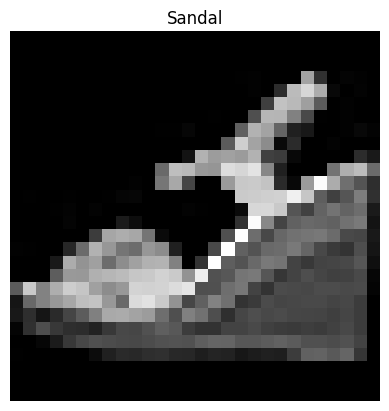

In [ ]:
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image_tensor, target = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image_tensor.squeeze(), cmap="gray")
plt.title(classes_list[target])
plt.axis("Off"); # can use False (without quotes)
print(f"Image size: {image_tensor.shape}")
print(f"Label: {target}, Target size: {target.shape}")

# **2. Linear Model for FashinMNIST**

- Data loaded and prepared!

- Time to build a **baseline model** by subclassing `nn.Module`.

## **2.1. Flattening Layer**

- The **baseline model** can be a simple model, say with two [`nn.Linear()`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) layers, similar to the illustrations.  
- But, because we are dealing with **image** data, we will use a **different layer to start** things off.
    - That is, the [`nn.Flatten()`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) layer that **flattens the dimensions of a tensor into a single vector**.
    - Neural networks require the **inputs** of `nn.Linear()` layers to be in the form of **a vector of features**.

In [ ]:
x = train_features_batch[0]
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]


- Create as flatten layer.
- Flatten the example, say, perform forward pass


In [ ]:
flatten_model = nn.Flatten()
x_flat = flatten_model(x)
print(f"Shape after flattening: {x_flat.shape} -> [color_channels, height*width]")

Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


- The `nn.Flatten()` layer took the shape from `[color_channels, height, width]` to `[color_channels, height*width]`.
- So the pixel data from **height and width** dimensions are turned to one long **vector of features**.
- So how many input features are there?
    - The number of input features is 784 (height $\times$ width = 784 pixels).

- Let us see the display of the numbers between the two.

In [ ]:
# print(x)
# print(x_flat)

## **2.2. Define Model and Create Its Instance**

In [ ]:
from torch import nn
class LinearModelFashionMNIST(nn.Module):
  def __init__(self, input_nodes, hidden_nodes, output_nodes):
    super().__init__()
    self.fc_layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_nodes, out_features=hidden_nodes),
        nn.Linear(in_features=hidden_nodes, out_features=output_nodes)
        )

  def forward(self, x):
    return self.fc_layers(x)

- Let us instantiate a model setting following parameters:
    * `input_nodes` : Number of input features: 28 pixels high by 28 pixels = 784 features.
    * `hidden_nodes` : Number of hidden units in the hdden layer (hyperparameter).
    * `output_nodes` : Number of classes.

In [ ]:
torch.manual_seed(42)

linear_model = LinearModelFashionMNIST(
    input_nodes=28*28, # len(nn.flatten(train_features_batch[0]))
    hidden_nodes=16,
    output_nodes=len(classes_list)
    )

linear_model

LinearModelFashionMNIST(
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [ ]:
linear_model.__class__.__name__

'LinearModelFashionMNIST'

- Let us **keep the instance of the model to CPU** for now.
- We will run a small test for running on CPU and GPU soon.

In [ ]:
linear_model.to("cpu")

LinearModelFashionMNIST(
  (fc_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [ ]:
linear_model.state_dict()

OrderedDict([('fc_layers.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0313, -0.0194, -0.0231,  ...,  0.0165,  0.0038,  0.0114],
                      [-0.0301, -0.0315, -0.0168,  ...,  0.0032,  0.0287, -0.0005],
                      [-0.0150, -0.0167, -0.0028,  ...,  0.0172,  0.0117, -0.0291]])),
             ('fc_layers.1.bias',
              tensor([ 0.0214,  0.0289,  0.0107,  0.0284, -0.0170, -0.0234, -0.0287, -0.0056,
                      -0.0035, -0.0203, -0.0122, -0.0115,  0.0344, -0.0026,  0.0290,  0.0034])),
             ('fc_layers.2.weight',
              tensor([[ 0.0891,  0.1441, -0.2301, -0.1127, -0.1900,  0.2429,  0.0917, -0.1048,
                       -0.1885,  0.1384,  0.0580, -0.1230, -0.1814, -0.130

## **2.3. Dummy Predictions**

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
with torch.inference_mode():
  outputs = linear_model(dummy_x)

outputs, outputs.shape, len(outputs.squeeze())

(tensor([[ 0.0599, -0.0578, -0.1531, -0.3557, -0.1761,  0.0471,  0.2426, -0.5298,
          -0.0458, -0.0342]]),
 torch.Size([1, 10]),
 10)

- The model outputs 10 prediction logits.
- If the input nodes is set to 28, it works but the **output shape will not be correct**.

## **2.4. Setup Loss, Optimizer and Evaluation Metrics**

- We could import various evaluation metrics from the [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/) package.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=linear_model.parameters(), lr=0.1)

def accuracy_metric(y_true, y_pred):
  correct_preds = torch.eq(y_true, y_pred).sum().item()
  return (correct_preds / len(y_pred)) * 100

**Creating Experiment Timing Function**

- Two important things to be tracked during experimentation are:

    1.  **model's performance** (loss and accuracy values)
    2. **computational time** (how fast the model runs).

- Let us make a function to measure the time it takes the model to train on CPU versus using a GPU.
-  Import the [`timeit.default_timer()`](https://docs.python.org/3/library/timeit.html#timeit.default_timer) function from the Python [`timeit`](https://docs.python.org/3/library/timeit.html) module.

In [ ]:
from timeit import default_timer as timer
def computing_time( start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Computing time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
start_time = timer()
# some code
end_time = timer()
computing_time(start = start_time, end = end_time, device = "cpu")

Computing time on cpu: 0.000 seconds


8.748399997671186e-05

## **2.5. Training and Testing**

In [ ]:
torch.manual_seed(42)
device = "cpu"

linear_model = LinearModelFashionMNIST(
    input_nodes=28*28, # len(nn.flatten(train_features_batch[0]))
    hidden_nodes=16,
    output_nodes=len(classes_list)
    ).to(device)

linear_model
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=linear_model.parameters(), lr=0.1)

- To keep track of the number of epochs trained through, a progress bar can be added by importing `tqdm` from `tqdm.auto`.
- [`tqdm`](https://github.com/tqdm/tqdm) is one of the most popular progress bar libraries for Python.
- `tqdm.auto` automatically decides better progress bar for the computing environment (e.g., Jupyter Notebook, Python script, Colab).

In [ ]:
from tqdm.auto import tqdm

n = len(train_dataloader.dataset)

torch.manual_seed(42)
time_start = timer()

epochs = 3 # small just for faster training times

for epoch in tqdm(range(1, epochs + 1)):
  print(f"Epoch: {epoch}\n-------")
  linear_model.train()
  train_loss = 0
  train_acc = 0
  for batch_idx, (X, y) in enumerate(train_dataloader):
    linear_model.train()
    y_pred = linear_model(X)
    y_pred_labels = y_pred.argmax(dim=1)  # (logits -> pred_prob -> pred_labels), softmax is skipped
    loss = criterion(y_pred, y)
    train_loss += loss
    train_acc += accuracy_metric(y_true = y, y_pred = y_pred_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (batch_idx + 1) % 500 == 0:
        print(f"Looked at {(batch_idx + 1) * BATCH_SIZE}/{n} samples.") # BATCH_SIZE = len(X) =len(y)
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  test_loss, test_acc = 0, 0
  linear_model.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = linear_model(X_test)
      test_pred_labels = test_pred.argmax(dim=1)
      test_loss += criterion(test_pred, y_test)
      test_acc += accuracy_metric(y_true = y_test, y_pred = test_pred_labels)
    test_loss /= len(test_dataloader) # it doesnot work outside inf mode using /=, I do not know why
    test_acc /= len(test_dataloader)
  print(f"\nLoss (train, test): {train_loss:.5f}, {test_loss:.5f} | Accuracy (train, test): {train_acc:.2f}%, {test_acc:.2f}%.\n")

time_end = timer()

time_linear_model = computing_time(start = time_start, end = time_end, device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1
-------
Looked at 16000/60000 samples.
Looked at 32000/60000 samples.
Looked at 48000/60000 samples.

Loss (train, test): 0.58506, 0.50618 | Accuracy (train, test): 79.30%, 82.24%.

Epoch: 2
-------
Looked at 16000/60000 samples.
Looked at 32000/60000 samples.
Looked at 48000/60000 samples.

Loss (train, test): 0.47503, 0.48423 | Accuracy (train, test): 83.29%, 83.07%.

Epoch: 3
-------
Looked at 16000/60000 samples.
Looked at 32000/60000 samples.
Looked at 48000/60000 samples.

Loss (train, test): 0.45409, 0.47700 | Accuracy (train, test): 84.07%, 83.41%.

Computing time on cpu: 37.662 seconds


- Looks like the baseline model did fairly well.
- It did not take too long to train either, even just on the CPU.
- Hope, it will speed up on the GPU.


## **2.6. Model Predictions and Evaluation**

- It is a good practice to write a function to evaluate differerent trained models of same purpose in similar ways.
- Let us create a function that takes in a **trained model**, a `DataLoader`, a **loss** function and an **accuracy** function.
- It will be the same as the testing mode except functionalizing and returning a dictionary of results.

In [ ]:
torch.manual_seed(42)
def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    criterion: torch.nn.Module,
    accuracy_metric
    ):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            y_pred_labels = y_pred.argmax(dim=1)
            loss += criterion(y_pred, y)
            acc += accuracy_metric(y_true = y, y_pred = y_pred_labels)
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__, # only works when model is created with a class
        "model_loss": loss.item(),
        "model_acc": acc
        }

- Calculate trained model results on test dataset.

In [ ]:
linear_model_results = eval_model(
    model = linear_model,
    data_loader = test_dataloader,
    criterion = criterion,
    accuracy_metric = accuracy_metric
    )

linear_model_results

{'model_name': 'LinearModelFashionMNIST',
 'model_loss': 0.47699886560440063,
 'model_acc': 83.40654952076677}

# **3. Non-Linear Model for FashinMNIST**

## **3.1. Setup Device**

- Model training time is dependent on hardware used.
- Generally, **more processors means faster training**.
- Smaller models on smaller datasets will often train faster than large models and large datasets.
- Let us check whether GPU is available using `!nvidia-smi` or `torch.cuda.is_available(`).

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
torch.cuda.is_available()

False

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## **3.2. Model with Linear and Non-Linear Layers**

- Now let us define a new model with non-linear functions (`nn.ReLU()`) in the hidden and output layers.

In [ ]:
class NonLinearModelFashionMNIST(nn.Module):
  def __init__(self, input_nodes, hidden_nodes, output_nodes):
    super().__init__()
    self.fc_layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_nodes, out_features=hidden_nodes),
        nn.ReLU(),
        nn.Linear(in_features=hidden_nodes, out_features=output_nodes),
        nn.ReLU()
        )

  def forward(self, x):
    return self.fc_layers(x)

- Notice how we kept most of the settings of the model the same except for one change: adding **non-linear layers**.
- This is a standard practice for running a series of ML experiments, change something and observe what happens.

In [ ]:
torch.manual_seed(42)
nonlinear_model = NonLinearModelFashionMNIST(
    input_nodes = 28*28,
    hidden_nodes = 16,
    output_nodes = len(classes_list)
).to(device)

next(nonlinear_model.parameters()).device

device(type='cpu')

## **3.3. Loss, Optimizer and Evaluation Metrics**



In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=nonlinear_model.parameters(), lr=0.1)

## **3.4. Functionizing Training and Testing Loops**

- So far we have been writing train and test loops over and over.
- Now let us write them in **function forms** so they can be called again and again.
- To make device-agnostic code, `.to(device)` will be called on `X`, `y`, and instantiated model.

- Following is a function called `train_step()` which takes in a **model**, a `DataLoader` a **loss** function and an **optimizer**.

In [ ]:
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    criterion: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_metric,
    device: torch.device = device
    ):
    train_loss, train_acc = 0, 0
    model.to(device)
    model.train()
    for batch_idx, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        y_pred_labels = y_pred.argmax(dim=1)
        loss = criterion(y_pred, y)
        train_loss += loss
        train_acc += accuracy_metric(y_true = y, y_pred = y_pred_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

- The testing loop will be called `test_step()` that will take in a **model**, a `DataLoader`, a **loss** function and **evaluation** metrics.

In [ ]:
def test_step(
    data_loader: torch.utils.data.DataLoader,
    model: torch.nn.Module,
    criterion: torch.nn.Module,
    accuracy_metric,
    device: torch.device = device
    ):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_pred_labels = test_pred.argmax(dim=1)
            test_loss += criterion(test_pred, y)
            test_acc += accuracy_metric(y_true=y, y_pred = test_pred_labels)
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

## **3.5. Training and Testing Model**

- The training and testing functions will be in inside loop for iterating over the training epochs.

In [ ]:
torch.manual_seed(42)

t_start = timer() # store starting time
epochs = 3
for epoch in tqdm(range(1, epochs + 1)):
    print(f"Epoch: {epoch}\n---------")

    train_step(
        data_loader = train_dataloader,
        model = nonlinear_model,
        criterion =criterion,
        optimizer = optimizer,
        accuracy_metric = accuracy_metric
        )

    test_step(
        data_loader = test_dataloader,
        model = nonlinear_model,
        criterion = criterion,
        accuracy_metric = accuracy_metric
    )

t_end = timer() # store starting time

time_nonlinear_model = computing_time(start = t_start, end = t_end, device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1
---------
Train loss: 1.02631 | Train accuracy: 65.97%
Test loss: 0.95198 | Test accuracy: 67.55%

Epoch: 2
---------
Train loss: 0.86983 | Train accuracy: 69.32%
Test loss: 0.88346 | Test accuracy: 69.21%

Epoch: 3
---------
Train loss: 0.83948 | Train accuracy: 70.22%
Test loss: 0.84870 | Test accuracy: 70.15%

Computing time on cpu: 36.111 seconds


In [ ]:
print(f"Linear Model on: {next(linear_model.parameters()).device} took {time_linear_model}, .")
print(f"Non-Linear Model on {next(nonlinear_model.parameters()).device} took {time_nonlinear_model}.")

Linear Model on: cpu took 37.66213975100001, .
Non-Linear Model on cpu took 36.111151423999985.


- The model trained but the **training time looks longer** while using the GPU. - Why?
    - One reason could be the **bottleneck** between copying data from the CPU memory (default) to the GPU memory.
        - Since the dataset and model are both so small, the **computational speed of the GPU are outweighed by the time the data is transferred to GPU**.
        - So for smaller models and datasets, CPU might actually be the optimal device to compute on.
        - But, the speed of computing on GPU for larger datasets and models can far outweighed the cost of transferring the data.

  - Note also that the computing time on CUDA and CPU depends on the **quality of the CPU/GPU hardware** being used.

- Lets evaluate the trained non-linear model and see how it went.


In [ ]:
# torch.manual_seed(42)

# nonlinear_model_results = eval_model(
#   model = nonlinear_model,
#   data_loader = test_dataloader,
#   criterion = criterion,
#   accuracy_metric = accuracy_metric
#   )
# nonlinear_model_results

- What causes the `RuntimeError` to occur?
    - The reason for the above error occurrence is due to the `eval_model()` function is **not written device-agnostic code**.

    - So it can be fixed by passing a target `device` parameter to the `eval_model()` function and try calculating the results again.

In [ ]:
torch.manual_seed(42)
def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    criterion: torch.nn.Module,
    accuracy_metric,
    device: torch.device = device
    ):
    loss, acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            y_pred_labels = y_pred.argmax(dim=1)
            loss += criterion(y_pred, y)
            acc += accuracy_metric(y_true = y, y_pred = y_pred_labels)

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
        }

- Compute results now.

In [ ]:
nonlinear_model_results = eval_model(model=nonlinear_model,
                             data_loader=test_dataloader,
                             criterion = criterion,
                             accuracy_metric = accuracy_metric,
                             device=device
                             )

nonlinear_model_results

{'model_name': 'NonLinearModelFashionMNIST',
 'model_loss': 0.8486992120742798,
 'model_acc': 70.14776357827476}

- Check the linear model results

In [ ]:
linear_model_results = eval_model(model=linear_model,
                                  data_loader=test_dataloader,
                                  criterion = criterion,
                                  accuracy_metric = accuracy_metric,
                                  device = device
                                  )

linear_model_results

{'model_name': 'LinearModelFashionMNIST',
 'model_loss': 0.47699886560440063,
 'model_acc': 83.40654952076677}

- It looks like adding **non-linearities to the model** made it perform **worse** than the baseline linear model.
    - *What we thought should work, might not work*.
    - *What we thought might not work, may work*.
- It seems like the model is **overfitting** on the training data.
    - **Overfitting** means the model is **learning the training data well**.
    - The patterns are **not generalizable to the testing data**.

- TSome ways to prevent overfitting include:
    1. a **smaller** model.
    2.  a **larger dataset** (the more data, the more chance a model has to learn generalizable patterns).
    3.  a **different model** (some models fit certain kinds of data better than others)

- Let us take a look at using a **different model**.

# **4. Convolutional Neural Network (CNN)**

- [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN or ConvNet) is known for its **capabilities to find patterns in visual data**.
- A common practice in machine learning is finding a model architecture and replicating it.
- Let us consider a CNN model known as **TinyVGG** from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.
    - It follows the typical structure of a convolutional neural network:

      `Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

    - `[Convolutional layer -> activation layer -> pooling layer]` can be called (convolutional) block.
    - The contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.
- We have already seen **linear layers**, **non-linear layers**, and **flattening layers**.
- In CNN, convolutional layers ([`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)) and max pooling layers ([`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)) are included.

- The `2d` stand for 2-dimensional data.
    - E.g., images have two dimensions: height and width.
    - Each color channel has two dimensions too: height and width.
- For other dimensional data (such as `1d` for **text** (`nn.Conv1d()`) or `3d` for **3D object**s (`nn.Conv3d()`).

- **Better to include examples for these layers with given inputs and seeing outputs**

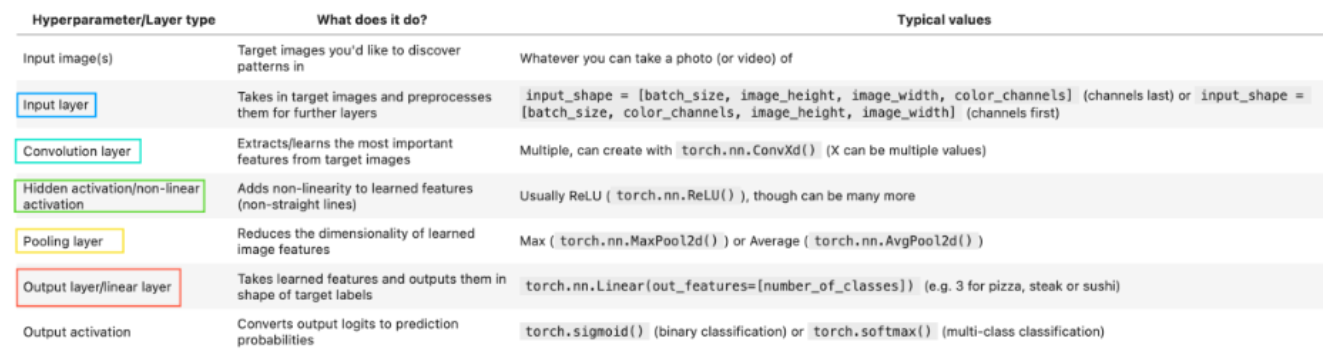

| **Problem type** | **Model to use (generally)** | **Code example** |
| ----- | ----- | ----- |
| Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [HuggingFace Transformers](https://huggingface.co/docs/transformers/index) |


- Let us now build a CNN that replicates the model on the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.

![TinyVGG architecture, as setup by CNN explainer website](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

## **4.1. TinyVGG CNN Architecture**

- Different types of CNN model architectures: [VGG116](https://www.geeksforgeeks.org/vgg-16-cnn-model/) (original ones), VGGNet, ResNet, LeNet, AlexNet, ZF Net, ...
- Now create a convolutional neural network that replicates model architecture copying [TinyVGG](https://poloclub.github.io/cnn-explainer/).


- Convolution layer:
    - `kernel_size = 3` -> (3,3) -> size of square going over z image: (3,3)
    - `stride = 1` -> default
    - `padding = 1` -> options = "`valid`" (no padding) or "`same`" (output has same shape as input) or `int` for specific number
- Pooling layer:
    - `(kernel_size = 2, stride = 2)` -> default `stride` is same as `kernel_size`

- Where did in_features for the output layer come from? It is because each layer of the network compresses and changes the shape of the inputs data.
- but 'color channel' is 1st but in TinyVGG last

In [ ]:
class TinyModelFashionMNIST(nn.Module):
  def __init__(self, input_units: int, hidden_units: int, output_units: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_units, out_channels = hidden_units,
                kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                  kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                  kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
        )
    self.output_block = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 0 * 0, out_features=output_units)
        )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    print(f"Output shape of Conv Block 1: {x.shape}.")
    x = self.conv_block_2(x)
    print(f"Output shape of Conv Block 2: {x.shape}.")
    x = self.output_block(x)
    print(f"Output shape of output block: {x.shape}")
    return x

- Because each layer of the network compresses and changes the shape of the inputs data.
  - Where did the `in_features` for the output layer (`nn.Linear(in_features = hidden_units * 0? * 0?, out_features = output_units)`) come from?
  - Execute the forward pass and see the print results of each layer.
  
- Let us instantiate the model.

In [ ]:
torch.manual_seed(42)
Tiny_vgg_model = TinyModelFashionMNIST(input_units = 1, hidden_units = 10,
                                            output_units = len(classes_list)
                                            ).to(device)
Tiny_vgg_model

/usr/local/lib/python3.10/dist-packages/torch/nn/init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


-  In the `input_units = 1`, the number of color channels (gray), but TinyVGG uses 3 (RGB), so it could be 3.

In [ ]:
Tiny_vgg_model

TinnyVGGModelFashionMNIST(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (output): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=0, out_features=10, bias=True)
  )
)

- Let us step through the two layers: [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html).

In [ ]:
Tiny_vgg_model.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

## **4.2. Convolutional Layer: [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)**

- The `nn.Conv2d()` layer performs a **convolutional operation** on the data (see [CNN Explainer](https://poloclub.github.io/cnn-explainer/)).
- To test the layers out, let us create some dummy input data, sample **batch of random numbers** with **same size as image batch**.

In [ ]:
m = nn.Conv2d(16, 33, 3, stride=2)
m

Conv2d(16, 33, kernel_size=(3, 3), stride=(2, 2))

In [ ]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))      # [BS, CH, H, W]
test_image = images[0]
print(f"Image batch: {images.shape}, Single image: {test_image.shape}")

Image batch: torch.Size([32, 3, 64, 64]), Single image: torch.Size([3, 64, 64])


- Create a convolutional layer and pass input data through it (try changing the parameters and see what happens).
- `nn.Conv2d()` parameters:
    * `in_channels`: Number of inputs of the conv layer.
    * `out_channels`: Number of outputs produced by the conv layer.
    * `kernel_size`: Size of the convolving kernel or filter.
    * `stride`: Convolving kernel step size at a time.
    * `padding`: added to all four sides of input.

In [ ]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels = 3, out_channels = 10,
                       kernel_size = 3, stride = 1, padding = 0)
conv_layer_output = conv_layer(test_image)
conv_layer_output, conv_layer_output.shape

(tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],
 
         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],
 
         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191,

- Notice what happens to the shape.
- The same shape as the first layer of TinyVGG on [CNN Explainer](https://poloclub.github.io/cnn-explainer/).
- Different channel sizes as well as different pixel sizes.

- What if we change the the kernel size?

In [ ]:
torch.manual_seed(42)

conv_layer_2 = nn.Conv2d(in_channels = 3, out_channels = 10,
                       kernel_size = (5, 5), stride = 1, padding = 0)
conv_layer_2_output = conv_layer_2(test_image)
conv_layer_2_output, conv_layer_2_output.shape

(tensor([[[-5.9479e-01,  5.1592e-01, -1.5861e+00,  ..., -9.0964e-02,
            4.6227e-01, -6.0360e-01],
          [ 3.4598e-01, -1.7241e-01, -4.1079e-01,  ...,  1.6331e-01,
            5.2090e-01,  1.3144e+00],
          [-2.8077e-02, -4.4019e-01, -1.2165e+00,  ..., -2.4385e-01,
           -2.4841e-01,  3.5551e-01],
          ...,
          [ 6.3600e-01,  2.2507e-01,  2.0247e-01,  ...,  3.0973e-01,
            1.3567e-01,  7.5306e-02],
          [-8.4161e-01,  1.1192e-01,  1.7929e-01,  ...,  5.0107e-01,
           -6.6306e-01,  4.7155e-01],
          [ 1.0285e+00,  1.5175e+00,  5.5489e-01,  ..., -7.3607e-01,
           -7.1551e-01, -8.6667e-01]],
 
         [[ 1.3999e-01, -1.2239e+00, -1.0109e+00,  ...,  6.2065e-01,
           -7.5165e-01,  1.1006e+00],
          [-4.6926e-01,  4.6811e-01,  2.8089e-01,  ..., -2.5950e-01,
            1.1656e+00, -2.9479e-01],
          [ 1.5869e-01, -1.5092e-01,  1.5218e+00,  ...,  4.4120e-01,
            1.9650e-01,  5.0309e-01],
          ...,
    

- The output is smaller as the kernel size increases.
    - The `nn.Conv2d()` is compressing the information stored in the image.
    - It does this by performing operations on the input (the test image) against its internal parameters.
    - Data goes in and the layers try to update their internal parameters (patterns) to lower the loss function.
    - Checking out the `.state_dict()` results the weights and biases setup.

In [ ]:
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

- The shapes of these parameters are manipulated by the inputs passed to `nn.Conv2d()`.
- Let us check them out and get shapes of weights and biases.

In [ ]:
print(f"conv_layer_2 weight shape: {conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: {conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: torch.Size([10]) -> [out_channels=10]


- Changing stride to 2 (skipping two pixels at a time):

In [ ]:
torch.manual_seed(42)

conv_layer_3 = nn.Conv2d(in_channels = 3, out_channels = 10,
                       kernel_size = (5, 5), stride = 2, padding = 0)
conv_layer_3_output = conv_layer_3(test_image)
conv_layer_3_output.shape

torch.Size([10, 30, 30])

- The output halves due to skipping 2 pixels at a time.

- Changing padding

In [ ]:
torch.manual_seed(42)

conv_layer_4 = nn.Conv2d(in_channels = 3, out_channels = 10,
                       kernel_size = (5, 5), stride = 2, padding = 1)
conv_layer_4_output = conv_layer_4(test_image)
conv_layer_4_output.shape

torch.Size([10, 31, 31])

- Changing the out channels

In [ ]:
torch.manual_seed(42)

conv_layer_4 = nn.Conv2d(in_channels = 3, out_channels = 64,
                       kernel_size = (3, 3), stride = 1, padding = 1)
conv_layer_4_output = conv_layer_4(test_image)
conv_layer_4_output.shape

torch.Size([64, 64, 64])

## **4.3. Max Pooling Layer: [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)**

- Now let us check out what happens through `nn.MaxPool2d()`
- It has **no learnable parameters** unlike `nn.Conv2d()`.

    - Create a sample `nn.MaxPoo2d()` layer
    - Pass data through just the `conv_layer`
    - Pass data through the `max_pool_layer`

In [ ]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels = 3, out_channels = 10,
                       kernel_size = 3, stride = 1, padding = 1)

conv_layer_output = conv_layer(test_image)
conv_layer_output.shape

torch.Size([10, 64, 64])

In [ ]:
max_pool_layer = nn.MaxPool2d(kernel_size = 2)
max_pool_layer_output = max_pool_layer(conv_layer_output)
max_pool_layer_output.shape

torch.Size([10, 32, 32])

In [ ]:
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
test_image_through_conv.shape

torch.Size([1, 10, 64, 64])

In [ ]:
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
test_image_through_conv_and_max_pool.shape

torch.Size([1, 10, 32, 32])

- Notice the change in the shape of the output of an `nn.MaxPool2d()` layer.
- The `kernel_size` of the `nn.MaxPool2d()` layer affects the size of the output shape.
    - In the above case, the shape halves from a `64x64` image to `32x32` image.

- Create a random smaller tensor with a similiar number of dimensions to the images.
- Passing through the max pool layer returns maximum value from the input tensor
- What happens when changing the kernel_size.

In [ ]:
max_pool_layer = nn.MaxPool2d(kernel_size = 2)
max_pool_layer

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [ ]:
torch.manual_seed(42)

input_tensor = torch.randn(size=(1, 2, 2))
input_tensor, input_tensor.shape

(tensor([[[0.3367, 0.1288],
          [0.2345, 0.2303]]]),
 torch.Size([1, 2, 2]))

In [ ]:
max_pool_layer = nn.MaxPool2d(kernel_size = 2)
max_pool_tensor = max_pool_layer(input_tensor)
max_pool_tensor, max_pool_tensor.shape

(tensor([[[0.3367]]]), torch.Size([1, 1, 1]))

- Notice the final two dimensions go from `[2, 2]` to `[1, 1]`.
- Also notice the max pooling layer returns the **maximum** value.
- If `kernel_size=1`, no change. Why?


In [ ]:
max_pool_layer = nn.MaxPool2d(kernel_size = 1)
max_pool_tensor = max_pool_layer(input_tensor)
max_pool_tensor, max_pool_tensor.shape

(tensor([[[0.3367, 0.1288],
          [0.2345, 0.2303]]]),
 torch.Size([1, 2, 2]))

- I assume following code provides 4 values but is providing 1 value. I do not why. I need to figure it out.

In [ ]:
torch.manual_seed(42)

input_tensor = torch.randn(size=(1, 3, 3))
max_pool_layer = nn.MaxPool2d(kernel_size = 2)
max_pool_tensor = max_pool_layer(input_tensor)

input_tensor, input_tensor.shape, max_pool_tensor, max_pool_tensor.shape

(tensor([[[ 0.3367,  0.1288,  0.2345],
          [ 0.2303, -1.1229, -0.1863],
          [ 2.2082, -0.6380,  0.4617]]]),
 torch.Size([1, 3, 3]),
 tensor([[[0.3367]]]),
 torch.Size([1, 1, 1]))

In [ ]:
torch.manual_seed(42)

input_tensor = torch.randn(size=(1, 4, 4))
max_pool_layer = nn.MaxPool2d(kernel_size = 2)
max_pool_tensor = max_pool_layer(input_tensor)

input_tensor, input_tensor.shape, max_pool_tensor, max_pool_tensor.shape

(tensor([[[ 1.9269,  1.4873,  0.9007, -2.1055],
          [ 0.6784, -1.2345, -0.0431, -1.6047],
          [-0.7521,  1.6487, -0.3925, -1.4036],
          [-0.7279, -0.5594, -0.7688,  0.7624]]]),
 torch.Size([1, 4, 4]),
 tensor([[[1.9269, 0.9007],
          [1.6487, 0.7624]]]),
 torch.Size([1, 2, 2]))

- From an AI perspective, the whole goal of a neural network to **compress** information.
- This means, that from the point of view of a neural network, **intelligence is compression**.
- This is the idea of the use of an `nn.MaxPool2d()` layer.
  - It takes the maximum value from a portion of a tensor and disregard the rest.
  - In essence, lowering the dimensionality of a tensor whilst still retaining a (hopefully) significant portion of the information.
  - What do you think the [`nn.AvgPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.AvgPool2d.html) layer does?

In [ ]:
torch.manual_seed(42)

input_tensor = torch.randn(size=(1, 3, 3))
max_pool_layer = nn.AvgPool2d(kernel_size = 2)
max_pool_tensor = max_pool_layer(input_tensor)

input_tensor, input_tensor.shape, max_pool_tensor, max_pool_tensor.shape

(tensor([[[ 0.3367,  0.1288,  0.2345],
          [ 0.2303, -1.1229, -0.1863],
          [ 2.2082, -0.6380,  0.4617]]]),
 torch.Size([1, 3, 3]),
 tensor([[[-0.1068]]]),
 torch.Size([1, 1, 1]))

In [ ]:
torch.manual_seed(42)

input_tensor = torch.randn(size=(1, 4, 4))
max_pool_layer = nn.AvgPool2d(kernel_size = 2)
max_pool_tensor = max_pool_layer(input_tensor)

input_tensor, input_tensor.shape, max_pool_tensor, max_pool_tensor.shape

(tensor([[[ 1.9269,  1.4873,  0.9007, -2.1055],
          [ 0.6784, -1.2345, -0.0431, -1.6047],
          [-0.7521,  1.6487, -0.3925, -1.4036],
          [-0.7279, -0.5594, -0.7688,  0.7624]]]),
 torch.Size([1, 4, 4]),
 tensor([[[ 0.7145, -0.7131],
          [-0.0977, -0.4506]]]),
 torch.Size([1, 2, 2]))

## **4.4. Inputs Features of Output Block**

In [ ]:
image_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000,

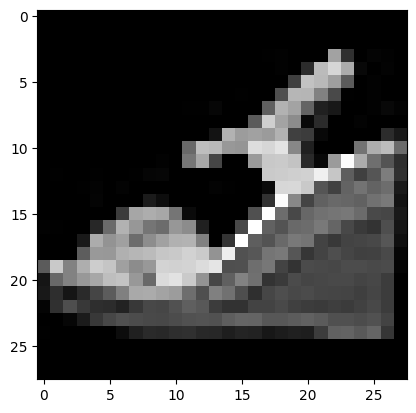

In [ ]:
image = plt.imshow(image_tensor.squeeze(), cmap = "gray")
image;

- Create a random image tensor.

In [ ]:
rand_image_tensor = torch.randn(size = (1, 28, 28))
rand_image_tensor

tensor([[[ 7.1346e-01, -1.9506e+00, -6.0311e-01, -7.9420e-01,  2.3616e-02,
          -7.1655e-01,  9.3131e-01,  1.1275e-01,  2.1544e-01, -1.2842e+00,
           2.2291e+00,  8.2494e-01,  4.5539e-01,  5.5991e-01,  2.1209e-01,
           1.1861e+00,  2.8820e-01,  1.6998e+00,  2.4325e+00,  2.5851e-01,
           1.3330e+00,  1.2649e-01, -1.5771e-01,  5.7832e-01,  1.2233e+00,
           7.9177e-01,  5.0744e-01,  4.3917e-01],
         [-8.3579e-01, -6.9006e-01,  4.6465e-01,  9.8267e-01,  4.1360e-01,
          -5.2391e-01,  1.3423e-01, -1.1246e+00,  1.3094e+00, -7.2855e-02,
           1.1227e+00, -2.4535e-01,  2.7226e-01, -4.2859e-01,  8.2400e-01,
          -1.3990e+00, -6.8156e-01,  8.5384e-01,  1.5678e+00, -5.9977e-01,
           2.3984e-01,  2.1043e+00, -7.7001e-01, -1.5130e+00, -4.0357e-01,
          -4.4248e-01, -1.2654e+00,  1.4841e+00],
         [-2.0433e-01, -1.1886e+00,  1.4066e-01,  6.4668e-01, -2.3070e-01,
           3.9579e-01, -1.3584e-01,  2.4918e-01, -3.8097e-01, -1.6328e+00,


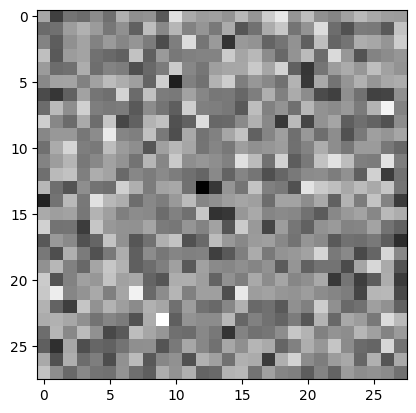

In [ ]:
plt.imshow(rand_image_tensor.squeeze(), cmap = "gray");

- Pass the random tensor through the model
    - This will provide the shapes of the output of the two convolutional blocks which will help as determine the in-features of the last layer of the model.
    - There is also a formula to be used for such in the [documentation](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) of `Conv2d()`.

In [ ]:
# Tiny_vgg_model(rand_image_tensor.unsqueeze(0).to(device))

Output shape of Conv Block 1: torch.Size([1, 10, 14, 14]).
Output shape of Conv Block 2: torch.Size([1, 10, 7, 7]).


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x490 and 0x10)

- The dimensions of `conv_block_2` and `output_block` do not match.
  * `[1, 10, 7, 7]`
      - batch = `1`,
      - hidden units = `10`,
      - output shape of `conv_block_2 = (7, 7)`.
  * `10x49`
      - `10` is hidden units and
      - `49 = 7x7` is flattened output of `conv_block_2`.
  * Hence, in-features of last block should be modified as:
        `nn.Linear(in_channels = hidden_units * 7 * 7, out_features = output_shape)`.

In [ ]:
class TinyVGGModelFashionMNIST(nn.Module):
  def __init__(self, input_units: int, hidden_units: int, output_units: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_units, out_channels = hidden_units,
                kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                  kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                  kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
        )
    self.output_block = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 7 * 7, out_features=output_units)
        )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.output_block(x)
    return x

In [ ]:
torch.manual_seed(42)
Tiny_vgg_model = TinyVGGModelFashionMNIST(input_units = 1, hidden_units = 10,
                                            output_units = len(classes_list)
                                            ).to(device)

Tiny_vgg_model

TinnyVGGModelFashionMNIST(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (output_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
Tiny_vgg_model(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0519, -0.0943,  0.0765, -0.0365,  0.0039,  0.0314, -0.0113, -0.0011,
         -0.0078, -0.0267]], grad_fn=<AddmmBackward0>)

## **4.5. Training and Testing CNN Model**

- Use `nn.CrossEntropyLoss()` as the loss function since a multi-class classification problem.
- `torch.optim.SGD()` as the optimizer with a learning rate of `0.1`.
- Use the `train_step()` and `test_step()` functions created before.

In [ ]:
torch.manual_seed(42)
Tiny_vgg_model = TinyVGGModelFashionMNIST(input_units = 1, hidden_units = 10,
                                            output_units = len(classes_list)
                                            ).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = Tiny_vgg_model.parameters(), lr = 0.1)

t_start = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(
        data_loader = train_dataloader,
        model = Tiny_vgg_model,
        criterion = criterion,
        optimizer = optimizer,
        accuracy_metric = accuracy_metric,
        device = device
    )
    test_step(
        data_loader = test_dataloader,
        model = Tiny_vgg_model,
        criterion = criterion,
        accuracy_metric = accuracy_metric,
        device = device
    )

t_end = timer()

time_Tiny_vgg_model = computing_time(start =t_start, end = t_end, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.57716 | Train accuracy: 79.14%
Test loss: 0.39148 | Test accuracy: 85.90%

Epoch: 1
---------
Train loss: 0.35641 | Train accuracy: 87.20%
Test loss: 0.37143 | Test accuracy: 86.04%

Epoch: 2
---------
Train loss: 0.31685 | Train accuracy: 88.59%
Test loss: 0.33307 | Test accuracy: 87.75%

Computing time on cpu: 215.144 seconds


 - Looks like the performance  of the TinyVGG model is better.
 - Let us evaluate results.

In [ ]:
Tiny_vgg_model_results = eval_model(
    model = Tiny_vgg_model,
    data_loader = test_dataloader,
    criterion = criterion,
    accuracy_metric = accuracy_metric
)
Tiny_vgg_model_results

{'model_name': 'TinnyVGGModelFashionMNIST',
 'model_loss': 0.33307161927223206,
 'model_acc': 87.74960063897764}

## **4.6. Comparing Models' Performances and Computing Times**

- A regular practice in ML is building multiple models and performing multiple training experiments to see which performs best.
- Let us compare the three models

In [ ]:
print(f"Model 0: {linear_model_results}, \nModel 1: {nonlinear_model_results}, \nModel 2: {Tiny_vgg_model_results}")

Model 0: {'model_name': 'LinearModelFashionMNIST', 'model_loss': 0.47699886560440063, 'model_acc': 83.40654952076677}, 
Model 1: {'model_name': 'NonLinearModelFashionMNIST', 'model_loss': 0.8486992120742798, 'model_acc': 70.14776357827476}, 
Model 2: {'model_name': 'TinnyVGGModelFashionMNIST', 'model_loss': 0.33307161927223206, 'model_acc': 87.74960063897764}


In [ ]:
print(f"Model 0: {time_linear_model}, \nModel 1: {time_nonlinear_model}, \nModel 2: {time_Tiny_vgg_model}")

Model 0: 37.66213975100001, 
Model 1: 36.111151423999985, 
Model 2: 215.14410971200004


- TinyVGG model performs the best (lowest loss, highest accuracy) but has the longest computational time.
- The linear model performs better than the non-linear model.

- Combining performance results and computing times into a DataFrame.

In [ ]:
models_results_df = pd.DataFrame([
    linear_model_results,
    nonlinear_model_results,
    Tiny_vgg_model_results
    ])
models_results_df["training_time"] = [time_linear_model, time_nonlinear_model, time_Tiny_vgg_model]
models_results_df

,model_name,model_loss,model_acc,training_time
0,LinearModelFashionMNIST,0.476999,83.406550,37.662140
1,NonLinearModelFashionMNIST,0.848699,70.147764,36.111151
2,TinnyVGGModelFashionMNIST,0.333072,87.749601,215.144110


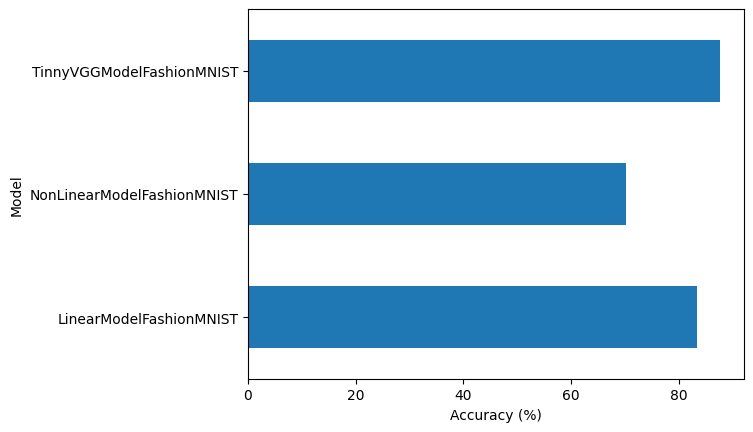

In [ ]:
models_results_df.set_index("model_name")["model_acc"].plot(kind = "barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model");

**Performance-Speed Tradeoff**

- Better performance of a larger, more complex model often comes at a sacrifice of computational speed.

- The computing times are very dependant on the hardware to be used.
- Generally, more CPU cores leads to faster computing times.
- Newer hardware (in terms of age) are also often better due to incorporating technology advances.



## **4.7. Predictions on Random Samples and Visualization**

- Compared the three models.
- Further evaluate the best performing model.
- To do so, following function `make_predictions()` can pass traind **model** and some **data** for making prediction.

In [ ]:
def make_predictions(
    model: torch.nn.Module,
    data: list,
    device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)       # Add an extra (batch) dim and send to device
            pred_logits = model(sample).squeeze()                    # Forward pass (model outputs raw logits)
            pred_probabs = torch.softmax(pred_logits, dim = 0)       # note: softmax on z "logits" dim, not on "batch" dim
                                                                     # (in this case we have a batch size of 1, so can perform on dim=0)
            pred_probs.append(pred_probabs.cpu())                    # Get pred_prob off GPU for further calculations
    return torch.stack(pred_probs)                                   # Stack the pred_probs to turn list into a tensor

In [ ]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
list(test_dataset)[:1]

[(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0

In [ ]:
# test_dataset[:10]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

`ValueError: only one element tensors can be converted to Python scalars`

In [ ]:
test_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
# test_dataset[0][:10].shape

`AttributeError: 'tuple' object has no attribute 'shape'`

In [ ]:
image_tensor, label = test_dataset[0][:10]
# image_tensor.shape, label.shape

`AttributeError: 'int' object has no attribute 'shape'`

In [ ]:
image_tensor, label = test_dataset[0][:10]
image_tensor.shape, label

(torch.Size([1, 28, 28]), 9)

- Shape of the tensor and associated label are obtained.

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_dataset), k = 9): # 9 examples from test_dataset, not the test_dataloader
    test_samples.append(sample)
    test_labels.append(label)
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({classes_list[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


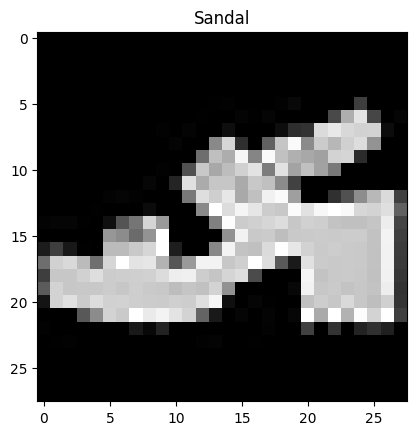

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap = "gray");
plt.title(classes_list[test_labels[0]]);

- Use `make_predictions()` function to predict on `test_samples`.

In [ ]:
pred_probs= make_predictions(model=Tiny_vgg_model, data=test_samples)
pred_probs[:2]

tensor([[1.1767e-08, 8.6203e-11, 1.8827e-10, 5.5265e-10, 5.2426e-09, 9.9995e-01,
         1.7953e-07, 1.2662e-07, 8.4186e-07, 5.2721e-05],
        [5.1035e-01, 3.0239e-01, 1.1327e-03, 4.9038e-02, 4.7023e-02, 2.9895e-05,
         8.9492e-02, 1.1676e-04, 3.9674e-04, 3.1374e-05]])

- Go from prediction probabilities to prediction labels by taking the `torch.argmax()` of the output of the `torch.softmax()` activation function.

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 0, 7, 4, 3, 0, 4, 7, 1])

- See whether the predictions in the same form as the test labels.

In [ ]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 0, 7, 4, 3, 0, 4, 7, 1]))

- The predicted classes are in the same format as the test labels.

- Let us visualize.

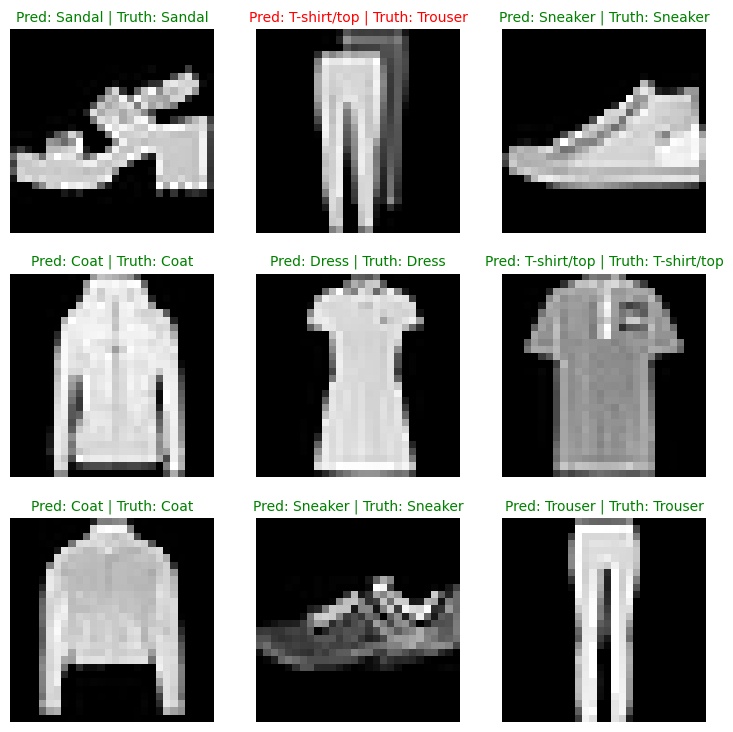

In [ ]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i + 1)                      # Create a subplot
  plt.imshow(sample.squeeze(), cmap="gray")             # Plot the target image
  pred_label = classes_list[pred_classes[i]]             # Find the prediction label (in text form, e.g. "Sandal")
  truth_label = classes_list[test_labels[i]]             # Get the truth label (in text form, e.g. "T-shirt")
  title = f"Pred: {pred_label} | Truth: {truth_label}"  # Create the title text of the plot
  if pred_label == truth_label:
      plt.title(title, fontsize=10, c = "g")            # green text if correct
  else:
      plt.title(title, fontsize=10, c = "r")            # red text if wrong
  plt.axis(False);

## **4.8. Confusion Matrix for Prediction Evaluation**

- Make predictions with the trained model (a confusion matrix compares predictions to true labels).

In [ ]:
y_preds = []
Tiny_vgg_model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    y_logits = Tiny_vgg_model(X)
    y_pred_labels = torch.softmax(y_logits, dim=1).argmax(dim=1)
    y_preds.append(y_pred_labels.cpu())

y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

- Construct a confusion matrix using [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/latest/references/modules.html?highlight=confusion#confusionmatrix).

In [ ]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 57.8 MB/s eta 0:00:00
mlxtend version: 0.23.1


- To plot the confusion matrix, [`mlxtend`](http://rasbt.github.io/mlxtend/)'s version should be of 0.19.0 or higher.

In [ ]:
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"

0.23.1


In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
test_dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
test_dataset.targets # labels

tensor([9, 2, 1,  ..., 8, 1, 5])

- Setup confusion matrix instance and compare predictions to targets

In [ ]:
confmat = ConfusionMatrix(num_classes = len(classes_list), task = 'multiclass')
confmat_tensor = confmat(preds = y_pred_tensor, target = test_dataset.targets)
confmat_tensor

tensor([[901,   0,  16,  14,   4,   2,  58,   0,   5,   0],
        [ 10, 965,   0,  16,   2,   0,   6,   0,   1,   0],
        [ 15,   1, 832,   4,  58,   0,  88,   0,   2,   0],
        [ 50,   2,  22, 880,  17,   0,  29,   0,   0,   0],
        [  4,   1, 102,  37, 700,   0, 155,   0,   1,   0],
        [  0,   0,   0,   1,   0, 972,   0,  16,   2,   9],
        [216,   1,  66,  21,  47,   0, 635,   0,  14,   0],
        [  0,   0,   0,   0,   0,  19,   0, 955,   0,  26],
        [  3,   1,   4,   5,   3,   3,  10,   3, 968,   0],
        [  0,   0,   0,   0,   0,   7,   0,  28,   0, 965]])

- Plot the confusion matrix

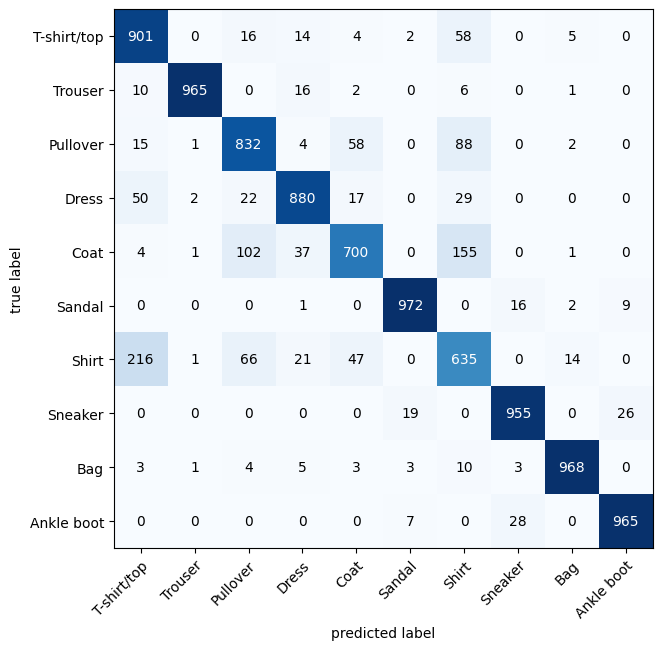

In [ ]:
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),    # matplotlib doesnot work with tensor, but works with NumPy
    class_names = classes_list,           # turn the row and column labels into class names
    figsize = (10, 7));

## **4.9. Save and Load Model**

- Recall that [saving and loading a PyTorch model](https://pytorch.org/tutorials/beginner/saving_loading_models.html) uses a combination of:
    * `torch.save` - saves a whole PyTorch model or only its `state_dict()`.
    * `torch.load` - loads a saved PyTorch object into working memory.
    * `torch.nn.Module.load_state_dict()` - passes loaded `state_dict()` into a model instance.

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)
MODEL_NAME = "Tiny_VGG_Model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Model saved: {MODEL_SAVE_PATH}")
torch.save(obj = Tiny_vgg_model.state_dict(), f = MODEL_SAVE_PATH)

Model saved: models/Tinny_VGG_Model.pth


- Note that passing the state dict on an instance of a model will error if the shapes are the same as the saved version.
- Try changing hidden nodes to some other value and see what will happen.

In [ ]:
Tiny_vgg_model_2 = TinyVGGModelFashionMNIST(input_units = 1, hidden_units = 10,
                                           output_units = len(classes_list))

Tiny_vgg_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

Tiny_vgg_model_2.to(device)

TinnyVGGModelFashionMNIST(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (output_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

- We can evaluate the loaded model with `eval_model()` to make sure its parameters work similarly to the one prior to saving.

In [ ]:
torch.manual_seed(42)

Tiny_vgg_model_2_results = eval_model(model = Tiny_vgg_model_2,
                                       data_loader = test_dataloader,
                                       criterion = criterion,
                                       accuracy_metric = accuracy_metric)

Tiny_vgg_model_2_results

{'model_name': 'TinnyVGGModelFashionMNIST',
 'model_loss': 0.33307161927223206,
 'model_acc': 87.74960063897764}

- Do these results look the same?

In [ ]:
Tiny_vgg_model_results

{'model_name': 'TinnyVGGModelFashionMNIST',
 'model_loss': 0.33307161927223206,
 'model_acc': 87.74960063897764}

- If two tensors are close to each other, `torch.isclose()` can be used to check with a given a tolerance level of closeness via the parameters `atol` (absolute tolerance) and `rtol` (relative tolerance).

In [ ]:
torch.isclose(torch.tensor(Tiny_vgg_model_results["model_loss"]),
              torch.tensor(Tiny_vgg_model_2_results["model_loss"]),
              atol = 1e-08, rtol = 0.0001)

tensor(True)

# **5. TinyVGG for Ethio-Foods Classification**

- Now let us classify if an image is of **ChikenStew_DoroWot**, **MincedRawBeef_Kitfo** or **ComboPlatter_Beyaynetu** by replicating the TinyVGG model from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.



In [36]:
import requests
import zipfile
from pathlib import Path

images_path = Path("images_data/")

if images_path.is_dir():
    print(f"{images_path} directory already exists, not downloaded.")
else:
  images_path.mkdir(parents = True, exist_ok = True)
  print(f'"{images_path}" directory created.')
  with open(images_path/"All_Images.zip", "wb") as f:
      request = requests.get("https://github.com/awolseid/Datasets/raw/main/EthioFoods.zip")

      f.write(request.content)
      print("EthioFoods downloaded.")
  with zipfile.ZipFile(images_path/"All_Images.zip", "r") as zip_ref:
      zip_ref.extractall(images_path)
      print("EthioFoods unzipped.")

"images_data" directory created.
EthioFoods downloaded.
EthioFoods unzipped.


In [37]:
images_path

PosixPath('images_data')

In [42]:
# #### to remove directory with files
# import shutil
# shutil.rmtree(images_path)

In [39]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [38]:
import os
from pathlib import Path

def directory_structure_and_counts(directory):
    directory_path = Path(directory)
    for root, dirs, files in os.walk(directory_path):
        current_dir = Path(root).as_posix()
        num_dirs = len(dirs)
        num_files = len(files)
        print(f"Directory: {current_dir}")
        print(f"       Subdirectories: {num_dirs}")
        print(f"                 Files: {num_files}")


In [40]:
import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

images_data_dir = images_path/"EthioFoods"
print(images_data_dir)
directory_structure_and_counts(images_data_dir)

images_data/EthioFoods
Directory: images_data/EthioFoods
       Subdirectories: 3
                 Files: 0
Directory: images_data/EthioFoods/ChikenStew_DoroWot
       Subdirectories: 0
                 Files: 87
Directory: images_data/EthioFoods/MincedRawBeef_Kitfo
       Subdirectories: 0
                 Files: 101
Directory: images_data/EthioFoods/ComboPlatter_Beyaynetu
       Subdirectories: 0
                 Files: 114


## **5.1. Split Images Data into Train and Test**

In [41]:
import os
import shutil
import random

def split_data(from_source_dir, to_saving_dir, split_ratio=0.8):
    random.seed(42)
    source_dir, saving_dir = from_source_dir, to_saving_dir

    train_dir = os.path.join(saving_dir, 'train')
    test_dir = os.path.join(saving_dir, 'test')

    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    classes = os.listdir(source_dir)
    for label in classes:
        label_dir = os.path.join(source_dir, label)
        if not os.path.isdir(label_dir):
            continue

        os.makedirs(os.path.join(train_dir, label), exist_ok=True)
        os.makedirs(os.path.join(test_dir, label), exist_ok=True)

        files = os.listdir(label_dir)
        random.shuffle(files)

        split_point = int(len(files) * split_ratio)
        train_files = files[ : split_point]
        test_files = files[split_point : ]

        for file in train_files:
            shutil.copy(os.path.join(label_dir, file), os.path.join(train_dir, label, file))

        for file in test_files:
            shutil.copy(os.path.join(label_dir, file), os.path.join(test_dir, label, file))

    return saving_dir

In [43]:
split_data_dir = split_data(from_source_dir=images_data_dir, to_saving_dir="train_test_data")
split_data_dir

'train_test_data'

### **5.2. Load Data to PyTorch Dataset and DataLoaders**

- A simple transform, only resizing the images to `(64, 64)` and turning them into tensors.



In [44]:
from torchvision import transforms

simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    ])

- Turn each of the training and test folders into a torch **Dataset** with `torchvision.datasets.ImageFolder()`

In [45]:
train_dir = "train_test_data/train"
test_dir = "train_test_data/test"

train_dir, test_dir

('train_test_data/train', 'train_test_data/test')

In [46]:
train_dataset_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_dataset_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

train_dataset_simple, test_dataset_simple

(Dataset ImageFolder
     Number of datapoints: 240
     Root location: train_test_data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 62
     Root location: train_test_data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

- Turn the **Datasets** into a **DataLoaders** using `torch.utils.data.DataLoader()`.
- Set the `batch_size=32` and `num_workers` to as many CPUs on the machine.

In [47]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()


train_dataloader_simple = DataLoader(train_dataset_simple,
                                     batch_size=BATCH_SIZE, shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_dataset_simple,
                                    batch_size=BATCH_SIZE, shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7e4ca42cfee0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e4ca42cff10>)

### **5.3. Define and Instantiate TinyVGG Model**

- We have already seen the TinyVGG model from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.
- This time using color images (`in_channels=3` for RGB pixels) instead of grayscale (`in_channels=1`).

In [48]:
class TinyVGG(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units * 0 * 0,
                      out_features = output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        print(f"Conv_block_1 output shape: {x.shape}.")
        x = self.conv_block_2(x)
        print(f"Conv_block_2 output shape: {x.shape}.")
        x = self.classifier(x)
        print(f"Classifier output shape: {x.shape}")
        return x

torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(train_dataset_simple.classes)).to(device)
model_0

/usr/local/lib/python3.10/dist-packages/torch/nn/init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=0, out_features=3, bias=True)
  )
)

### **5.4. Test Forward Pass on a Single Image**

In [49]:
image_tensor_batch_0, label_batch_0 = next(iter(train_dataloader_simple))
image_tensor_batch_0.shape, label_batch_0.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [50]:
image_tensor_batch_0[0].shape, label_batch_0[0]

(torch.Size([3, 64, 64]), tensor(1))

In [51]:
image_tensor_0, label_0 = image_tensor_batch_0[0].unsqueeze(dim = 0), label_batch_0[0]
print(f"Single image shape: {image_tensor_0.shape}, label: {label_batch_0[0]}.\n")

Single image shape: torch.Size([1, 3, 64, 64]), label: 1.



In [52]:
# model_0.eval()
# with torch.inference_mode():
#     pred = model_0(image_tensor_0.to(device))

- The shape of output of `conv_block_1` is `torch.Size([1, 10, 32, 32])` and that of `conv_block_2` is `torch.Size([1, 10, 16, 16])` where the shapes represent `[B, C, H W]` and 1 is the batch size for a single image.

    `The RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x2560 and 0x3)`

- This indicates that the shape of the input of the output (classifier layer) should be `10x16x16=2560`.

- We can also pass a batch of images and see the same error.

In [53]:
# model_0.eval()
# with torch.inference_mode():
#     pred = model_0(image_tensor_batch_0.to(device))

- The shape of output of `conv_block_1` is `torch.Size([32, 10, 32, 32])` and that of `conv_block_2` is `torch.Size([32, 10, 16, 16])` where the batch size is now 32.

    `RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x2560 and 0x3)`

- This indicates that the shape of the input of the output (classifier layer) should be `10x16x16=2560`.


- Following code includes the appropriate input shapes of the final output layer.

In [54]:
class TinyVGG(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2) # k-size=stride by default
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2) # k-size=stride by default
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units * 16 * 16,
                      out_features = output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        print(f"Conv_block_1 output shape: {x.shape}.")
        x = self.conv_block_2(x)
        print(f"Conv_block_2 output shape: {x.shape}.")
        x = self.classifier(x)
        print(f"Classifier output shape: {x.shape}")
        return x

torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3, # number of color channels (3 for RGB)
                  hidden_units = 10,
                  output_shape = len(train_dataset_simple.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [55]:
model_0.eval()
with torch.inference_mode():
    pred = model_0(image_tensor_batch_0.to(device))     # 3. Perform a forward pass on a batch of image tensors

                                  # 4. Convert model logits -> pred probs -> pred label
# print(f"Predicted logits:\n{pred}\n")
# print(f"Predicted probabilities:\n{torch.softmax(pred, dim=1)}\n")
# print(f"Predicted label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
# print(f"Actual label:\n{label_batch_0}")

Conv_block_1 output shape: torch.Size([32, 10, 32, 32]).
Conv_block_2 output shape: torch.Size([32, 10, 16, 16]).
Classifier output shape: torch.Size([32, 3])


- It looks like the model is outputting.
- **Note**: The shapes of the TinyVGG model of `conv_block_1` output is `[30, 30, 10]` and `conv_block_2` is `[13, 13, 10]`) keeping in mind that color channels are first in PyTorch.
- To exactly replicate the TinyVGG, we can set  `padding = 0` in all convolutional layers.
    - Also remember to adjust the in-features of the output layer accordingly.

In [56]:
class TinyVGG(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 2) # k-size=stride by default
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 2) # k-size=stride by default
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units * 13 * 13,
                      out_features = output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        print(f"Conv_block_1 output shape: {x.shape}.")
        x = self.conv_block_2(x)
        print(f"Conv_block_2 output shape: {x.shape}.")
        x = self.classifier(x)
        print(f"Classifier output shape: {x.shape}")
        return x

torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3, # number of color channels (3 for RGB)
                  hidden_units = 10,
                  output_shape = len(train_dataset_simple.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [57]:
model_0.eval()
with torch.inference_mode():
    pred = model_0(image_tensor_batch_0.to(device))     # 3. Perform a forward pass on a batch of image tensors

                                  # 4. Convert model logits -> pred probs -> pred label
# print(f"Predicted logits:\n{pred}\n")
# print(f"Predicted probabilities:\n{torch.softmax(pred, dim=1)}\n")
# print(f"Predicted label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
# print(f"Actual label:\n{label_batch_0}")

Conv_block_1 output shape: torch.Size([32, 10, 30, 30]).
Conv_block_2 output shape: torch.Size([32, 10, 13, 13]).
Classifier output shape: torch.Size([32, 3])


In [58]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

In [59]:
torchinfo.summary(model_0, input_size=[1, 3, 64, 64])

Conv_block_1 output shape: torch.Size([1, 10, 30, 30]).
Conv_block_2 output shape: torch.Size([1, 10, 13, 13]).
Classifier output shape: torch.Size([1, 3])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

- The above output shows the `TinyVGG` model comprizes of 3 sequential blocks.
- And inside each block, there are different combinations of layers (`Conv`, `ReLU` and `MaxPool` Layers) and the final block contains a `flatten` layer and a `linear` layer.
- We can also see the changes in the input and output shapes as data of a certain `input_size` moves through the model.

- Recall operator fusion

In [60]:
class TinyVGG(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 2) # k-size=stride by default
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 2) # k-size=stride by default
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units * 13 * 13,
                      out_features = output_shape)
        )

    def forward(self, x: torch.Tensor):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))

torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3, # number of color channels (3 for RGB)
                  hidden_units = 10,
                  output_shape = len(train_dataset_simple.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### **5.5. Functionalizing Train and Test Loops Together**

- Let us make three functions:
    1. `train_step()` - takes in a **Model**, a training **DataLoader**, a **Loss** function, an **Optimizer**, ..., and then trains the model.
    2. `test_step()` - takes in a **Model**, a testing **DataLoader**, a **Loss** function, ..., and then evaluates the model.
    3. `train()` - performs `train_step()` and `test_step()` together for a given number of epochs and returns a results dictionary.

#### **1. Functionalize Training Loop: `train_step()`**


In [61]:
def train_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    criterion: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    device = device):
    model.train()                                         # Put model in train mode
    train_loss, train_acc = 0, 0                          # Setup train loss and train accuracy values
    for batch_idx, (X, y) in enumerate(dataloader):       # Loop through data loader data batches
        X, y = X.to(device), y.to(device)                 # Send data to target device
        logit_preds = model(X)                                # 1. Forward pass
        loss = criterion(logit_preds, y)                      # 2. Calculate  and accumulate loss
        train_loss += loss.item()
        optimizer.zero_grad()                             # 3. Optimizer zero grad
        loss.backward()                                   # 4. Loss backward
        optimizer.step()                                  # 5. Optimizer step
                                                          # Calculate and accumulate accuracy metric for all batches
        prob_preds = torch.softmax(logit_preds, dim=1)
        y_preds = torch.argmax(prob_preds, dim=1)
        train_acc += (y_preds == y).sum().item() / len(y_preds)
    train_loss = train_loss / len(dataloader)             # Get average loss per batch
    train_acc = (train_acc / len(dataloader)) * 100       # Get average accuracy per batch
    return train_loss, train_acc

####**2. Functionalize Testing Loop: `test_step()`**

- The `test_step()` does not take an optimizer and does not perform gradient descent.
- It will make be in `.eval()` mode and make predictions turning the `torch.inference_mode()` context manager on.

In [62]:
def test_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    criterion: torch.nn.Module,
    device = device):
    model.eval()                                                    # Put model in eval mode
    test_loss, test_acc = 0, 0                                      # Setup test loss and test accuracy values
    with torch.inference_mode():                                    # Turn on inference context manager
        for batch_idx, (X, y) in enumerate(dataloader):             # Loop through DataLoader batches
            X, y = X.to(device), y.to(device)                       # Send data to target device
            logit_preds = model(X)                                  # 1. Forward pass
            loss = criterion(logit_preds, y)                        # 2. Calculate and accumulate loss
            test_loss += loss.item()
            y_preds = logit_preds.argmax(dim=1)                     # Calculate and accumulate accuracy
            test_acc += ((y_preds == y).sum().item() / len(y_preds))
    test_loss = test_loss / len(dataloader)                         # Get average loss  per batch
    test_acc = (test_acc / len(dataloader)) * 100                   # Get average accuracy per batch
    return test_loss, test_acc

#### **3. A `train()` Function Packaging `train_step()` and `test_step()` Functions**

- The `train_step()` and `test_step()` functions will be packaged in a `train()` function.

- Specificially, it'll:
    1. Take in a **Model**, train and test **DataLoaders**, a **Loss** function, an **Optimizer**, number of **epochs**, and other parameters required.
    2. Initialize an empty metrics dictionary for `train_loss`, `train_acc`, `test_loss` and `test_acc` values.
    3. Loop through the training and test step functions for the specified number of epochs.
    4. Update results dictionary with the updated metrics at each epoch.
    5. Return the results dictionary.

- To keep track of the number of epochs going, import `tqdm` from `tqdm.auto` ([`tqdm`](https://github.com/tqdm/tqdm).

In [63]:
from tqdm.auto import tqdm
                                                              # 1. Take in parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          criterion: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device):
                                                              # 2. Create empty results dictionary
    metrics_dict = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}
                                                              # 3. Loop through training and testing steps for each epoch
    for epoch in tqdm(range(1, epochs + 1)):
        train_loss, train_acc = train_step(model = model,
                                           dataloader = train_dataloader,
                                           criterion = criterion,
                                           optimizer = optimizer,
                                           device =  device)
        test_loss, test_acc = test_step(model = model,
                                        dataloader = test_dataloader,
                                        criterion = criterion,
                                        device = device)
                                                              # 4. Update results dictionary
        metrics_dict["train_loss"].append(train_loss)
        metrics_dict["train_acc"].append(train_acc)
        metrics_dict["test_loss"].append(test_loss)
        metrics_dict["test_acc"].append(test_acc)
        print(
            f"Epoch: {epoch} | "
            f"Train: loss = {train_loss:.4f}, "
            f"accuracy = {train_acc:.2f}% | "
            f"Test: loss = {test_loss:.4f}, "
            f"accuracy = {test_acc:.2f}%"
            )
    return metrics_dict                                        # 5. Return results at the end of the epochs

### **5.6. Train and Test Model**

- Time to put the `TinyVGG` model, DataLoaders and `train()` function together to see if we can build a model capable of discerning among the three types of foods!

- To keep the experiments quick, we'll train the model for **5 epochs**.
- Use the Python's [`timeit.default_timer()`](https://docs.python.org/3/library/timeit.html#timeit.default_timer) method to calculate the training time.



In [64]:
from timeit import default_timer as timer

torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

model_0 = TinyVGG(input_shape = 3, # number of color channels (3 for RGB)
                  hidden_units = 10,
                  output_shape = len(train_dataset_simple.classes)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr = 0.001)

start_time = timer()
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader_simple,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        criterion = criterion,
                        epochs = NUM_EPOCHS)
end_time = timer()

print(f"Training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | Train: loss = 1.1068, accuracy = 35.16% | Test: loss = 1.0930, accuracy = 36.88%
Epoch: 2 | Train: loss = 1.0937, accuracy = 37.89% | Test: loss = 1.0938, accuracy = 36.88%
Epoch: 3 | Train: loss = 1.0954, accuracy = 37.11% | Test: loss = 1.0934, accuracy = 36.88%
Epoch: 4 | Train: loss = 1.0954, accuracy = 36.72% | Test: loss = 1.0929, accuracy = 36.88%
Epoch: 5 | Train: loss = 1.0917, accuracy = 38.28% | Test: loss = 1.0915, accuracy = 36.88%
Training time: 16.453 seconds


- It looks like the model performed pretty poor.

### **5.7. Loss Evaluation**

In [65]:
model_0_results

{'train_loss': [1.1068159192800522,
  1.093651294708252,
  1.095378965139389,
  1.095393106341362,
  1.0917231291532516],
 'train_acc': [35.15625, 37.890625, 37.109375, 36.71875, 38.28125],
 'test_loss': [1.0929916501045227,
  1.0937697291374207,
  1.093435525894165,
  1.0928892493247986,
  1.0915358066558838],
 'test_acc': [36.875, 36.875, 36.875, 36.875, 36.875]}

In [66]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

We'll need to extract each of these keys and turn them into a plot.

In [67]:
def plot_loss_curves(results):
    loss = results['train_loss']                      # Get train losses
    test_loss = results['test_loss']                  # Get test losses

    accuracy = results['train_acc']                   # Get train accuracies
    test_accuracy = results['test_acc']               # Get test accuracies

    epochs = range(1, len(results['train_loss']) + 1) # Number of epochs

    plt.figure(figsize=(15, 7)) # Setup a plot
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label = 'Train')
    plt.plot(epochs, test_loss, label = 'Test')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Value')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label = 'Train')
    plt.plot(epochs, test_accuracy, label = 'Test')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend();

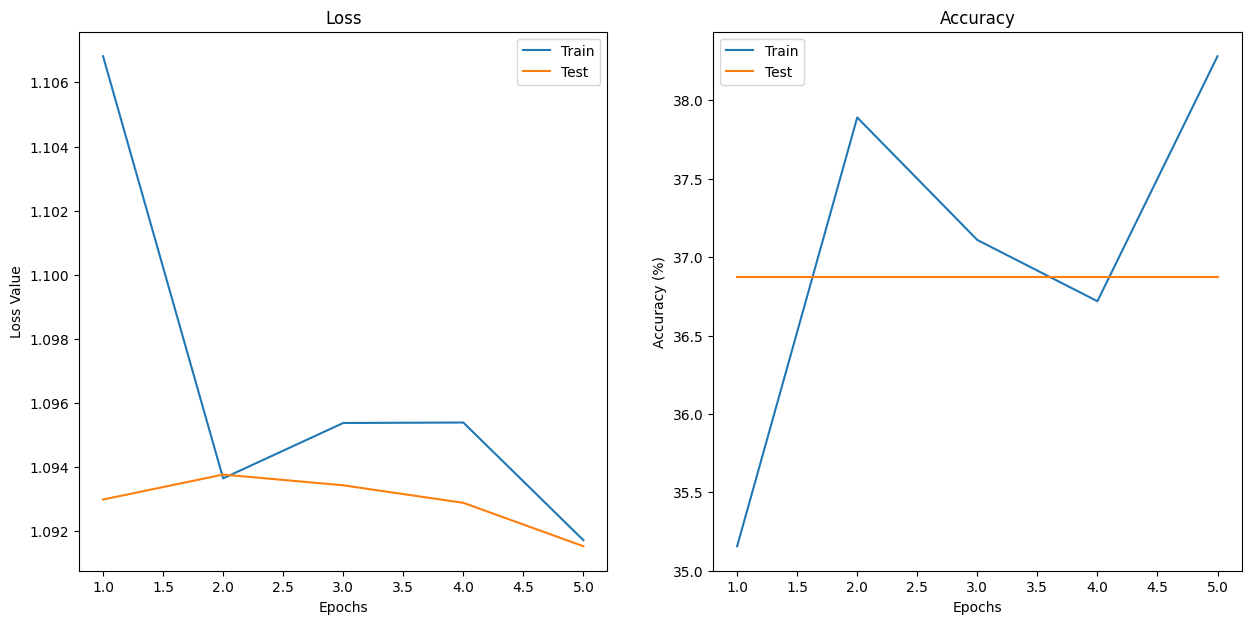

In [68]:
plot_loss_curves(model_0_results)

- We could try training the model for longer and see what happens when we plot a loss curve over a longer time horizon.

# **6. TinyVGG With Data Augmentation**


- Right now, looking at the loss curves of the `TinyVGG` model, it seems `model_0` is underfitting the data.

- This time, we will use **data augmentation** to see if it improves the results in anyway.

### **6.1. Create Transform With Augmentation**


- First, let us compose a training transform to include `transforms.TrivialAugmentWide()` as well as resize and turning images into tensors.
- We'll do the same for a testing transform except without the data augmentation.

In [69]:
from torch.utils.data import DataLoader

train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
    ])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
    ])

### **6.2. Convert Image Folders to Datasets and DataLoaders**


- Now let us turn the images into PyTorch **Datasets** using `torchvision.datasets.ImageFolder()` and then into **DataLoaders** with `torch.utils.data.DataLoader()`.
- Make sure the train dataset uses `train_transform_trivial_augment` and the test dataset uses  `test_transform`.

In [70]:
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 240
     Root location: train_test_data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 62
     Root location: train_test_data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [71]:
classes_list = train_data_augmented.classes
classes_list

['ChikenStew_DoroWot', 'ComboPlatter_Beyaynetu', 'MincedRawBeef_Kitfo']

- Make DataLoaders with a `batch_size=32` and with `num_workers` set to the number of CPUs available on the machine.

In [72]:
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_augmented = DataLoader(test_data_simple,
                                      batch_size=BATCH_SIZE,
                                      shuffle=False,
                                      num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_augmented

(<torch.utils.data.dataloader.DataLoader at 0x7e4ca5d05ed0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e4bcacb9000>)

### **6.3. Create a New Model Instance**

- Now to build our next model, `model_1` with similar architecture with `model_0` (TinyVGG).
- The only difference is now we are going to use an augmented training data.

In [73]:
class TinyVGG(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2) # k-size=stride by default
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2) # k-size=stride by default
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units * 16 * 16,
                      out_features = output_shape)
        )

    def forward(self, x: torch.Tensor):
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))

torch.manual_seed(42)
model_0 = TinyVGG(input_shape = 3, # number of color channels (3 for RGB)
                  hidden_units = 10,
                  output_shape = len(train_data_augmented.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [74]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape = 3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

### **6.4. Train and Test Model**

We'll use the same training setup as `model_0` with only the `train_dataloader` parameter varying:
* Train for 5 epochs.
* Use `train_dataloader = train_dataloader_augmented` as the training data in `train()`.
* Use `torch.nn.CrossEntropyLoss()` as the loss function (since we're working with multi-class classification).
* Use `torch.optim.Adam()` with `lr = 0.001` as the optimizer.                                                          

In [75]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


NUM_EPOCHS = 5

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model = model_1,
                        train_dataloader = train_dataloader_augmented,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        criterion =criterion,
                        epochs = NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | Train: loss = 1.1116, accuracy = 33.98% | Test: loss = 1.0940, accuracy = 36.88%
Epoch: 2 | Train: loss = 1.0987, accuracy = 36.33% | Test: loss = 1.0997, accuracy = 36.88%
Epoch: 3 | Train: loss = 1.0980, accuracy = 37.50% | Test: loss = 1.0955, accuracy = 36.88%
Epoch: 4 | Train: loss = 1.0979, accuracy = 32.03% | Test: loss = 1.0933, accuracy = 36.88%
Epoch: 5 | Train: loss = 1.0932, accuracy = 39.06% | Test: loss = 1.0925, accuracy = 36.88%
Total training time: 19.908 seconds


It doesn't look like the model performed well again.
Let's check out its loss curves.

### **6.5. Evaluating Model**

#### **Examining Loss Curves**


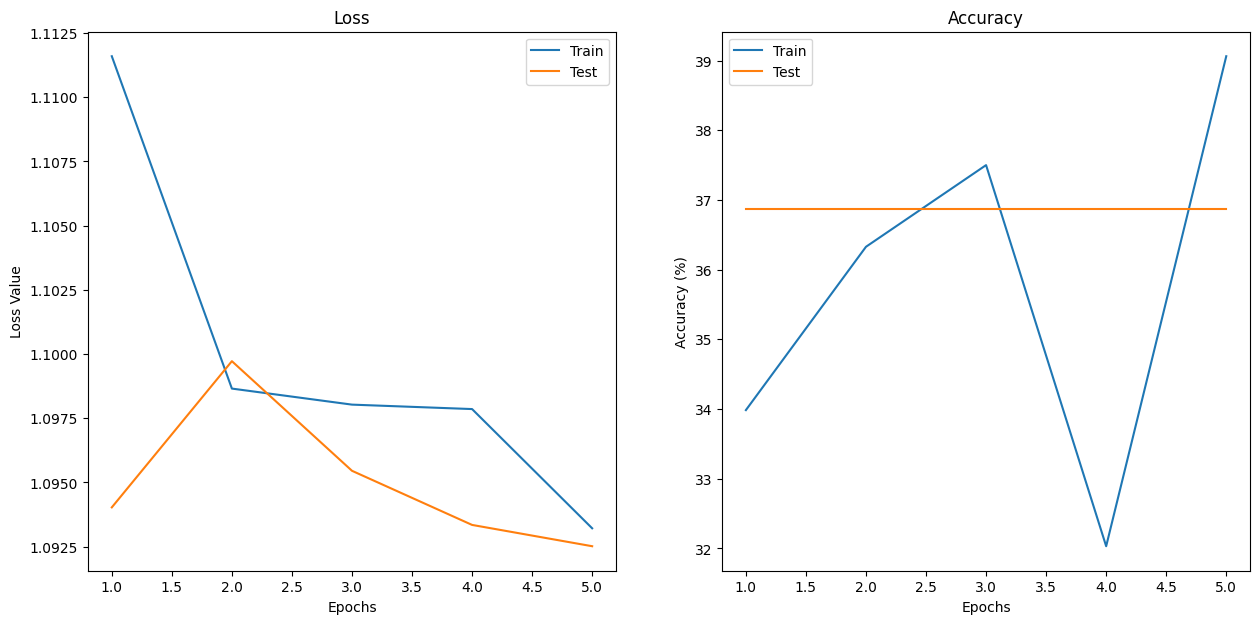

In [76]:
plot_loss_curves(model_1_results)

- Is the model **underfitting** or **overfitting**?
- What are some methods we could try to use to achieve higher accuracy and lower losses?

#### **Compare Model Results**

- After evaluating the modelling experiments on their own, it is important to compare them to each other.  
- There are a few different ways to do this: hard coding (what we are doing now), [PyTorch + TensorBoard](https://pytorch.org/docs/stable/tensorboard.html#module-torch.utils.tensorboard), [Weights & Biases](https://wandb.ai/site/experiment-tracking), [MLFlow](https://mlflow.org/).


- Let us first turn the model results in pandas DataFrames.

In [77]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106816,35.156250,1.092992,36.875
1,1.093651,37.890625,1.093770,36.875
2,1.095379,37.109375,1.093436,36.875
3,1.095393,36.718750,1.092889,36.875
4,1.091723,38.281250,1.091536,36.875


- Write some plotting code using `matplotlib` to visualize the results of `model_0` and `model_1` together.

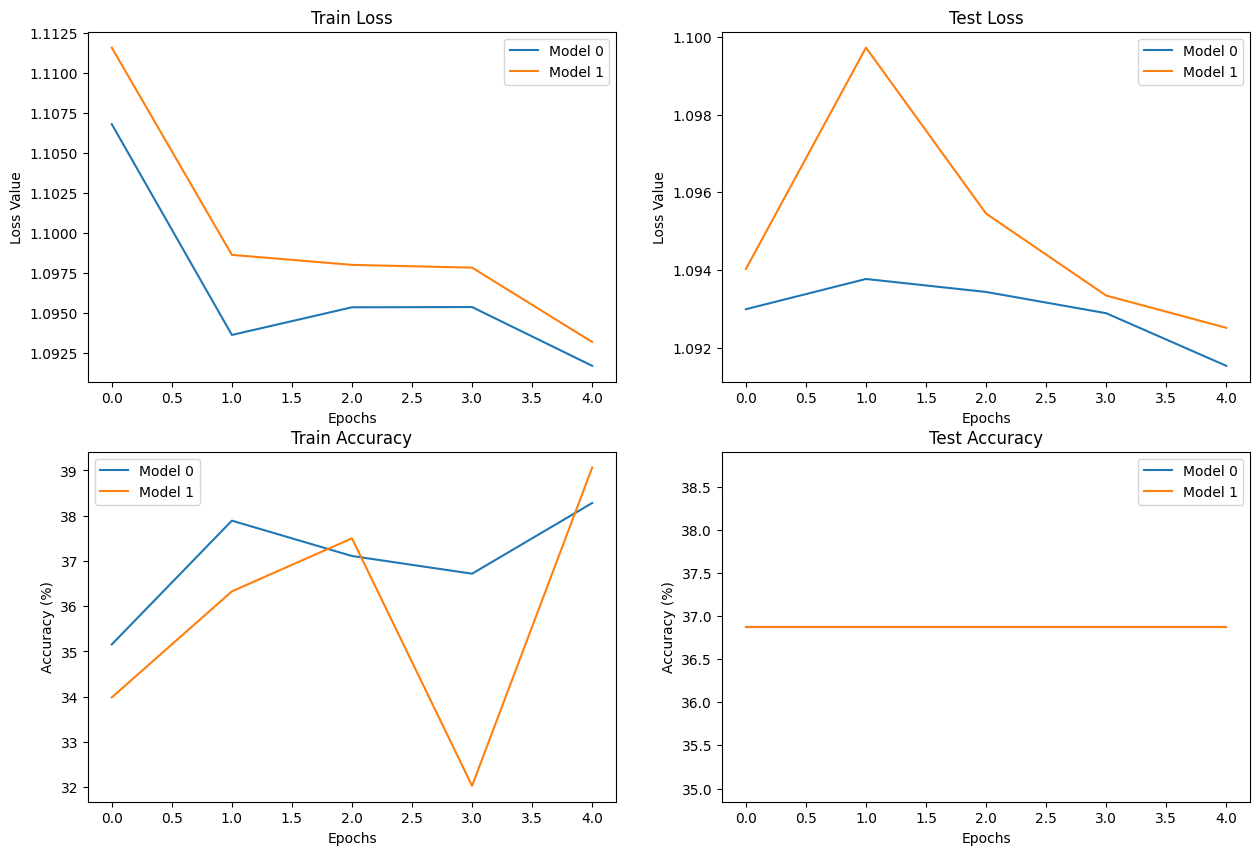

In [78]:
plt.figure(figsize=(15, 10)) # Setup a plot
epochs = range(len(model_0_df)) # Get number of epochs

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.ylabel('Loss Value')
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.ylabel('Loss Value')
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy (%)')
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy (%)')
plt.legend();

- It looks like the models both performed poorly and were kind of sporadic (the metrics go up and down sharply).

### **6.6. Make Prediction on a Custom Image**

- How could we use the model to make a prediction on one of an image?
- To do so,
    - we can load an image and then preprocess it to match the **data type** and **shape** that the model was trained on,
    - and should also be on **right device** before passing it to the model.


In [82]:
custom_image_path = "train_test_data/test/ComboPlatter_Beyaynetu/Image (28).jpeg"

Looks like we've got the image downloaded and ready to go at `data/04-pizza-dad.jpeg`.

#### **Loading Image With `torchvision.io`**

- PyTorch's `torchvision` has several input and output ("IO" or "io" for short) methods for reading and writing images and video in [`torchvision.io`](https://pytorch.org/vision/stable/io.html).
- To load in an image, use [`torchvision.io.read_image()`](https://pytorch.org/vision/stable/generated/torchvision.io.read_image.html#torchvision.io.read_image).
    - This method reads a JPEG or PNG image.
    - And turn it into a 3 dimensional RGB or grayscale `torch.Tensor`
    - With values of datatype `uint8` in range `[0, 255]`.

- Let us try it out.

In [83]:
import torchvision
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[143, 147, 151,  ..., 156, 159, 161],
         [143, 147, 151,  ..., 161, 157, 154],
         [144, 148, 152,  ..., 164, 159, 156],
         ...,
         [132, 131, 136,  ..., 105, 115, 107],
         [216, 219, 212,  ..., 208, 211, 206],
         [248, 248, 253,  ..., 248, 247, 243]],

        [[107, 111, 115,  ..., 136, 139, 141],
         [107, 111, 115,  ..., 141, 137, 134],
         [108, 112, 116,  ..., 144, 139, 136],
         ...,
         [ 99, 100, 103,  ...,  85,  93,  87],
         [193, 197, 189,  ..., 195, 195, 193],
         [240, 243, 245,  ..., 247, 243, 242]],

        [[ 71,  75,  79,  ..., 103, 106, 108],
         [ 71,  75,  79,  ..., 108, 104, 101],
         [ 72,  76,  80,  ..., 111, 106, 103],
         ...,
         [ 80,  79,  84,  ...,  61,  70,  63],
         [179, 183, 175,  ..., 178, 180, 176],
         [237, 239, 242,  ..., 243, 242, 238]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 225, 224])

Custom image dtype

- It looks like the image is in tensor format.
- Specifically it is of `torch.uint8` datatype and its values are between `[0, 255]`.
- Let us plot the image with `matplotlib` to make sure it looks okay.
- Remember to permute the dimensions from `CHW` to `HWC` for compatibility with `matplotlib`.

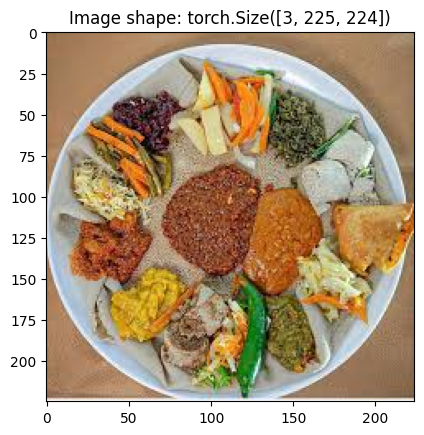

In [84]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))
plt.title(f"Image shape: {custom_image_uint8.shape}");
# plt.axis(False);

- Now let us make a prediction on the image with `uint8` format.

In [85]:
# model_1.eval()
# with torch.inference_mode():
#     image_pred_tensor = model_1(custom_image_uint8.to(device))

# image_pred_tensor

- What causes the above error?
    - The image tensor is of datatype `torch.uint8` and its values are between `[0, 255]`.
    - But the model is trained on image tensors of datatype `torch.float32` and with values between `[0, 1]`.

- That is why we get the  `RuntimeError` like the following because the image format is not compatible with the data that the model was trained.
      > `RuntimeError: Input type (unsigned char) and bias type (float) should be the same`

      or

      > `RuntimeError: Input type (torch.cuda.ByteTensor) and weight type (torch.cuda.FloatTensor) should be the same`

- So we need to convert it to the **same data type** as the data the model is trained on**.
- Let us fix this.

In [86]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)
custom_image_flt = custom_image / 255 # Divide the image pixel values by 255 to get them between [0, 1]

# Print out image data
print(f"Custom image tensor:\n{custom_image_flt}\n")
print(f"Custom image shape: {custom_image_flt.shape}\n")
print(f"Custom image dtype: {custom_image_flt.dtype}")

Custom image tensor:
tensor([[[0.5608, 0.5765, 0.5922,  ..., 0.6118, 0.6235, 0.6314],
         [0.5608, 0.5765, 0.5922,  ..., 0.6314, 0.6157, 0.6039],
         [0.5647, 0.5804, 0.5961,  ..., 0.6431, 0.6235, 0.6118],
         ...,
         [0.5176, 0.5137, 0.5333,  ..., 0.4118, 0.4510, 0.4196],
         [0.8471, 0.8588, 0.8314,  ..., 0.8157, 0.8275, 0.8078],
         [0.9725, 0.9725, 0.9922,  ..., 0.9725, 0.9686, 0.9529]],

        [[0.4196, 0.4353, 0.4510,  ..., 0.5333, 0.5451, 0.5529],
         [0.4196, 0.4353, 0.4510,  ..., 0.5529, 0.5373, 0.5255],
         [0.4235, 0.4392, 0.4549,  ..., 0.5647, 0.5451, 0.5333],
         ...,
         [0.3882, 0.3922, 0.4039,  ..., 0.3333, 0.3647, 0.3412],
         [0.7569, 0.7725, 0.7412,  ..., 0.7647, 0.7647, 0.7569],
         [0.9412, 0.9529, 0.9608,  ..., 0.9686, 0.9529, 0.9490]],

        [[0.2784, 0.2941, 0.3098,  ..., 0.4039, 0.4157, 0.4235],
         [0.2784, 0.2941, 0.3098,  ..., 0.4235, 0.4078, 0.3961],
         [0.2824, 0.2980, 0.3137,  ..

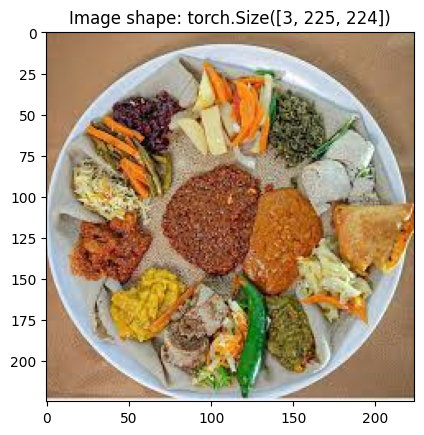

In [87]:
plt.imshow(custom_image_flt.permute(1, 2, 0))
plt.title(f"Image shape: {custom_image_flt.shape}");
# plt.axis(False);

- It looks like the image data is now in the **same data type** the model was trained on.
- We have got also same image.

- So let us try prediction.

In [92]:
# model_1.eval()
# with torch.inference_mode():
#     image_pred_tensor = model_1(custom_image_flt.to(device))

# image_pred_tensor

- Another `RuntimeError` concerning shape.
    - Notice the **shape** of the image is `[3, 4032, 3024]` which is very large.
    - However, the model was trained on images of shape `[3, 64, 64]`.
- How can we adjust the image shape to be the same with shape of the images the model was trained on?
- One way to do so is with `torchvision.transforms.Resize()`.

In [88]:
custom_image_transformed = transforms.Resize((64, 64))(custom_image_flt)

print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 225, 224])
New shape: torch.Size([3, 64, 64])


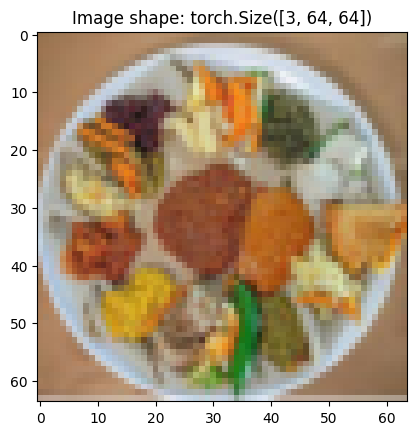

In [89]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))
plt.title(f"Image shape: {custom_image_transformed.shape}");
# plt.axis(False);

- The image is pixelated too because it is resized from `[4032, 3024]` to `[64, 64]`.


- Now try prediction.

In [91]:
# model_1.eval()
# with torch.inference_mode():
#     image_pred_tensor = model_1(custom_image_transformed.to(device))

# image_pred_tensor

- There is one dimension we forgot about. The batch size.
- The model expects image tensors with a batch size dimension at the start (`NCHW` where `N` is the batch size).

- The custom image is currently only `CHW`.
- We can add a batch size dimension using `torch.unsqueeze(dim=0)` to add an extra dimension the image.
    - Telling the model to predict on a single image (an image with a `batch_size` of 1).

In [90]:
model_1.eval()
with torch.inference_mode():
    image_pred_tensor = model_1(custom_image_transformed.unsqueeze(dim = 0).to(device))

image_pred_tensor

tensor([[-0.0606,  0.1441,  0.0607]])

- Alright, these raw outputs of a model are the **logits**.

- Let us convert from logits -> prediction probabilities (using `torch.softmax()` for multi-class classification).

In [93]:
custom_image_pred_probs = torch.softmax(image_pred_tensor, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction probabilities: tensor([[0.2980, 0.3657, 0.3364]])
Prediction label: tensor([1])


- Looking good.
- But of course the prediction label is still in index form.
- We can convert it to a string class name prediction by indexing on the `class_names` list.

In [94]:
custom_image_pred_class = classes_list[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'ComboPlatter_Beyaynetu'

- It looks like the model gets the prediction right.

- It is remembered that the model was performing poorly based on the evaluation metrics.
    - Also note that the model gives almost equal weight (nearly equal probability values) to all the classes.
    - The model does not really differentiate what it is to be predicted and is in turn just assigning similar values to each of the classes.

- Since the model is poorly trained, it is seems basically guessing the prediction.

#### **Opening Image Using `PIL`**

Or we can open in using PIL and the use `.ToTensor()` function.

In [95]:
from PIL import Image
custom_image_pil = Image.open(str(custom_image_path))
# custom_image_pil

In [96]:
custom_image_tensor = transforms.ToTensor()(custom_image_pil)
print(f"Image tensor:\n{custom_image_tensor}\n")
print(f"Image shape: {custom_image_tensor.shape}\n")
print(f"Image dtype: {custom_image_tensor.dtype}")
custom_image_resized = transforms.Resize((64, 64))(custom_image_tensor)
print(f"Resized image tensor:\n{custom_image_transformed}\n")
print(f"Resized image shape: {custom_image_transformed.shape}\n")
print(f"Resized image dtype: {custom_image_transformed.dtype}")

Image tensor:
tensor([[[0.5608, 0.5765, 0.5922,  ..., 0.6118, 0.6235, 0.6314],
         [0.5608, 0.5765, 0.5922,  ..., 0.6314, 0.6157, 0.6039],
         [0.5647, 0.5804, 0.5961,  ..., 0.6431, 0.6235, 0.6118],
         ...,
         [0.5176, 0.5137, 0.5333,  ..., 0.4118, 0.4510, 0.4196],
         [0.8471, 0.8588, 0.8314,  ..., 0.8157, 0.8275, 0.8078],
         [0.9725, 0.9725, 0.9922,  ..., 0.9725, 0.9686, 0.9529]],

        [[0.4196, 0.4353, 0.4510,  ..., 0.5333, 0.5451, 0.5529],
         [0.4196, 0.4353, 0.4510,  ..., 0.5529, 0.5373, 0.5255],
         [0.4235, 0.4392, 0.4549,  ..., 0.5647, 0.5451, 0.5333],
         ...,
         [0.3882, 0.3922, 0.4039,  ..., 0.3333, 0.3647, 0.3412],
         [0.7569, 0.7725, 0.7412,  ..., 0.7647, 0.7647, 0.7569],
         [0.9412, 0.9529, 0.9608,  ..., 0.9686, 0.9529, 0.9490]],

        [[0.2784, 0.2941, 0.3098,  ..., 0.4039, 0.4157, 0.4235],
         [0.2784, 0.2941, 0.3098,  ..., 0.4235, 0.4078, 0.3961],
         [0.2824, 0.2980, 0.3137,  ..., 0.43

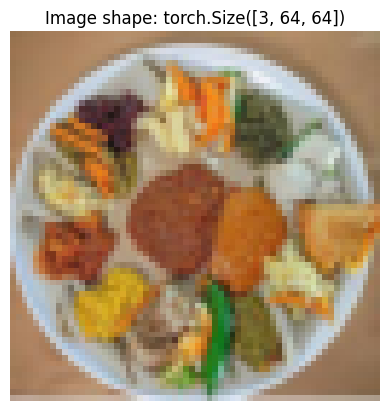

In [97]:
# Plot custom image
plt.imshow(custom_image_resized.permute(1, 2, 0))
plt.title(f"Image shape: {custom_image_resized.shape}")
plt.axis(False);

In [98]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_resized.unsqueeze(dim = 0).to(device))

custom_image_pred

tensor([[-0.0606,  0.1441,  0.0607]])

- We can use the test transform function to automatically perform the transformations.
- But the test transform function will not work on the `torchvision.io` image.

In [99]:
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
    ])
model_1.eval()
with torch.inference_mode():
  pred_image = model_1(test_transform(custom_image_pil).unsqueeze(dim = 0)).to(device)
pred_image

tensor([[-0.0606,  0.1441,  0.0607]])

In [100]:
pred_image

tensor([[-0.0606,  0.1441,  0.0607]])

#### **Functionalizing Custom Image Prediction**

Doing all of the above steps every time we'd like to make a prediction on a custom image would quickly become tedious.

So let's put them all together in a function we can easily use over and over again.

Specifically, let's make a function that:
1. Takes in a target image path and converts to the right datatype for our model (`torch.float32`).
2. Makes sure the target image pixel values are in the range `[0, 1]`.
3. Transforms the target image if necessary.
4. Makes sure the model is on the target device.
5. Makes a prediction on the target image with a trained model (ensuring the image is the right size and on the same device as the model).
6. Converts the model's output logits to prediction probabilities.
7. Converts the prediction probabilities to prediction labels.
8. Plots the target image alongside the model prediction and prediction probability.

In [101]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names = None,
                        transform=None,
                        device: torch.device = device):
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    target_image = target_image / 255.
    if transform:
        target_image = transform(target_image)
    model.to(device)
    model.eval()
    with torch.inference_mode():
        target_image = target_image.unsqueeze(dim=0)
        target_image_pred = model(target_image.to(device))
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    plt.imshow(target_image.squeeze().permute(1, 2, 0))
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

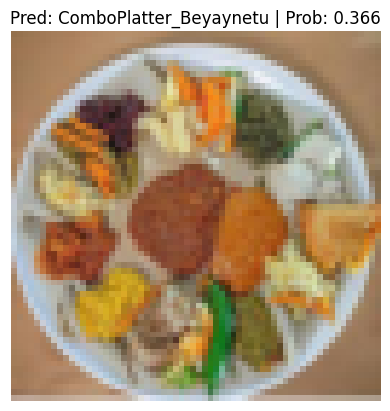

In [102]:
pred_and_plot_image(model = model_1,
                    image_path = custom_image_path,
                    class_names = classes_list,
                    transform = transforms.Resize((64, 64)),
                    device = device)

- Looks like the model got the prediction right just by guessing.

- **Exercise:** Try making a prediction with one of your own images of the three types of foods and see what happens.

- **Note:**
  - Predicting on a custom data with a trained model is possible, as long as the data type and shape are in a similar format to what the model was trained on.
  - Three of the most common deep learning and PyTorch issues:
    > 1. **Wrong datatypes** - The model expects `torch.float32` where thge original custom image was `uint8`.
    > 2. **Wrong shapes** - The model expected an input image of shape `[N, C, H, W]` or `[batch_size, color_channels, height, width]` whereas the custom image tensor was of shape `[color_channels, height, width]`.
    > 2. **Wrong device** - If the model is on the target `device` (say, the GPU) whereas the target data has not been moved to the target `device` yet.

  - Keep in mind, these errors present with almost every kind of data type (text, audio, structured data) and problem being worked with.
